# FINAL PROJECT 4: CLUSTERING
# 1. Perkenalan

Our Members:
1. Safril Ahmadi Sanmas / PYTN-KS17-022
2. Maulana Ridhwan Riziq / PYTN-KS17-010
3. Nadyla Alfiena Candra / PYTN-KS17-012
4. Novi Sabaniatir Rohmah / PYTN-KS17-023

Dalam industri keuangan, pemahaman mendalam terhadap perilaku konsumen menjadi kunci untuk mengembangkan layanan dan meningkatkan pengalaman pengguna. Dengan data transaksi kartu kredit dari 9000 pengguna selama 6 bulan, mencakup rincian transaksi seperti jenis pembelian, lokasi, jumlah pembayaran, dan aspek lainnya yang mencerminkan kebiasaan pengeluaran tiap individu. Proyek ini bertujuan untuk mengkategorikan pengguna kartu kredit dengan menerapkan konsep Clustering, khususnya dengan menggunakan algoritma dari Scikit-Learn. Tujuannya adalah mengelompokkan pengguna berdasarkan pola transaksi mereka.

Melalui penerapan Clustering pada dataset ini, diharapkan dapat mengenali kelompok-kelompok pengguna dengan perilaku serupa. Contohnya, kelompok yang sering berbelanja di lokasi tertentu atau memiliki kecenderungan menggunakan kartu kredit untuk jenis pembayaran atau pembelian tertentu. Dengan pemahaman yang lebih mendalam tentang preferensi dan kebiasaan pengguna yang diperoleh dari dataset ini, perusahaan keuangan diharapkan dapat menyesuaikan strategi pemasaran, mengoptimalkan produk, serta meningkatkan sistem keamanan untuk mendeteksi aktivitas yang mencurigakan.

Sebagai hasilnya, proyek ini diharapkan memberikan wawasan mendalam tentang perilaku pengguna kartu kredit, membuka peluang untuk meningkatkan layanan keuangan, mendeteksi pola penipuan, dan mengoptimalkan strategi bisnis di industri keuangan, sambil tetap relevan dalam menghadapi perubahan lingkungan bisnis yang dinamis.

Sebuah data yang berisi tentang Pengguna Pemegang Kartu Kredit. Data ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. Hal ini memerlukan pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran. Dengan adanya data set ini kita dapat membantu  perusahan dalam menentukan strategi pemasaran yang efektif. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut. 

Attribute Information: 
1. CUSTID - Identification of Credit Card holder (Categorical) 
2. BALANCE - Balance amount left in their account to make purchases.
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
4. PURCHASES - Amount of purchases made from account.
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go.
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment. 
7. CASHADVANCE - Cash in advance given by the user.
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid.
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance".
13. PURCHASESTRX - Number of purchase transactions made.
14. CREDITLIMIT - Limit of Credit Card for user .
15. PAYMENTS - Amount of Payment done by user.
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user.
17. PRCFULLPAYMENT - Percent of full payment paid by user.
18. TENURE - Tenure of credit card service for user 

Objektif Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut :
* Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn.
* Mampu mempersiapkan data untuk digunakan dalam Clustering.
* Mampu mengimplementasikan Clustering pada data yang diberikan.

# 2. Import Pustaka

Pada bagian ini adalah mengimport pustaka yang akan digunakan untuk persiapan data dan clustering.

In [1]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## for geospatial
import folium
import geopy

## for machine learning
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from sklearn import preprocessing, cluster
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from factor_analyzer import FactorAnalyzer
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 3. Data Loading

Memasukkan dataframe, kali ini menggunakan dataframe Pengguna Pemegang Kartu Kredit.

In [2]:
dtf = pd.read_csv("D:\Python for Data Science\Data\CC GENERAL.csv")
dtf.columns.tolist()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

Menampilkan jumlah baris dan kolom dataset tersebut.

In [3]:
# Melihat dimensi dataframe
print(f"Number of Rows\t\t: {dtf.shape[0]}")
print(f"Number of Columns\t: {dtf.shape[1]}")

Number of Rows		: 8950
Number of Columns	: 18


Dari hasil di atas, diketahui dataset tersebut memiliki 8950 baris dan 18 kolom. Terdapat kolom yang tidak berpengaruh terhadap proses clustering maka kolom tersebut dihilangkan.

In [4]:
# menghilangkan kolom CUST_ID
dtf = dtf.drop("CUST_ID",axis=1)

Setelah menghilangkan kolom 'CUST_ID', kita menampilkan 10 data teratas dan 10 data terbawah untuk melihat bentuk data tersebut.

In [5]:
# Menampilkan 10 data teratas
dtf.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [6]:
# Menampilkan 10 data terbawah
dtf.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


# 4. Data Cleaning

Pada tahap ini adalah tahap cleaning data, sebelumnya kita akan menampilkan tipe data, missing value, unique, dan duplicate pada data.

In [7]:
pd.DataFrame({
    "type":dtf.dtypes.values,
    "null":dtf.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in dtf.isnull().sum().values / len(dtf) * 100],
    "unique":[dtf[i].nunique() for i in dtf.columns],
    "duplicated": dtf.duplicated().sum(),
    "sample":[list(pd.Series(dtf.dropna()[i].unique()).sample())[0] for i in dtf.columns]
}).set_index(dtf.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,duplicated,sample
MINIMUM_PAYMENTS,float64,313,3.50%,8636,0,462.415150
CREDIT_LIMIT,float64,1,0.01%,205,0,500.000000
BALANCE,float64,0,0.00%,8871,0,38.424273
CASH_ADVANCE_FREQUENCY,float64,0,0.00%,54,0,1.500000
PRC_FULL_PAYMENT,float64,0,0.00%,47,0,0.444444
PAYMENTS,float64,0,0.00%,8711,0,233.025663
PURCHASES_TRX,int64,0,0.00%,173,0,168.000000
CASH_ADVANCE_TRX,int64,0,0.00%,65,0,6.000000
PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.00%,47,0,0.500000
BALANCE_FREQUENCY,float64,0,0.00%,43,0,0.666667


Pada hasil di atas, diketahui bahwa tipe data tersebut merupakan tipe data numerik. Pada data tersebut tidak terdapat data duplikat namun terdapat data yang missing pada variabel 'MINIMUM_PAYMENTS' dan 'CREDIT_LIMIT'. Diketahui jumlah data yang missing kurang dari 10% maka data yang missing tersebut akan dihapuskan.

In [8]:
# Menghapus baris yang terdapat missing value
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)

# 5. Exploratory Data Analysis

Setelah menghapus data yang missing, selanjutnya melihat analisis deskriptif dari dataset tersebut.

In [9]:
# Melihat Statistik Dataframe secara umum
dtf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


Dari hasil di atas, diketahui variabel

* BALANCE:
Rata-rata saldo kartu kredit adalah 1564.47 dengan variasi yang cukup besar (standar deviasi $2081.53).
Saldo minimum adalah 0, dan saldo maksimum mencapai 19043.14.
* BALANCE_FREQUENCY:
Sebagian besar pelanggan memiliki frekuensi pembaruan saldo tinggi, dengan rata-rata sekitar 0.88. Kebanyakan pelanggan memiliki frekuensi pembaruan saldo sebesar 1.00, menunjukkan pembaruan saldo yang sering.

* PURCHASES:
Rata-rata pembelian kartu kredit adalah 1003.20, dengan variasi yang besar (standar deviasi 2136.63). Pembelian tertinggi mencapai 49039.57.

* ONEOFF_PURCHASES:
Rata-rata pembelian satu kali adalah 592.44, dengan beberapa pelanggan yang tidak melakukan pembelian seperti itu. Pembelian satu kali tertinggi mencapai 40761.25.

* INSTALLMENTS_PURCHASES:
Rata-rata pembelian dengan angsuran adalah 411.07. Sebagian besar pelanggan memiliki pembelian angsuran di bawah 5000.

* CASH_ADVANCE:
Rata-rata penarikan uang tunai adalah 978.87, dengan variasi besar. Sejumlah pelanggan tidak melakukan penarikan uang tunai (nilai minimum adalah 0), sementara yang tertinggi mencapai 47137.21.

* PURCHASES_FREQUENCY:
Frekuensi pembelian rata-rata adalah 0.49, menunjukkan bahwa sebagian besar pelanggan melakukan pembelian setengah waktu dari periode pengamatan.

* ONEOFF_PURCHASES_FREQUENCY:
Frekuensi pembelian satu kali rata-rata adalah 0.20, menunjukkan bahwa sebagian besar pelanggan tidak sering melakukan pembelian satu kali.

* PURCHASES_INSTALLMENTS_FREQUENCY:
Frekuensi pembelian dengan angsuran rata-rata adalah 0.36, menunjukkan bahwa sebagian besar pelanggan tidak sering melakukan pembelian dengan angsuran.

* CASH_ADVANCE_FREQUENCY:
Frekuensi penarikan uang tunai rata-rata adalah 0.14, menunjukkan bahwa sebagian besar pelanggan jarang melakukan penarikan uang tunai.

* CASH_ADVANCE_TRX:
Rata-rata jumlah transaksi penarikan uang tunai adalah 3.25, dengan variasi yang cukup besar.

* PURCHASES_TRX:
Rata-rata jumlah transaksi pembelian adalah 14.71, dengan variasi yang signifikan.

* CREDIT_LIMIT:
Rata-rata batas kredit yang diberikan adalah 4494.45, dengan beberapa pelanggan memiliki batas kredit hingga 30000.00.

* PAYMENTS:
Rata-rata pembayaran adalah 1733.14, dengan pembayaran tertinggi mencapai 50721.48.

* MINIMUM_PAYMENTS:
Rata-rata pembayaran minimum adalah 864.21, dengan variasi yang besar.

* PRC_FULL_PAYMENT:
Rata-rata proporsi pembayaran penuh adalah 0.15, menunjukkan bahwa sebagian besar pelanggan jarang membayar saldo penuh.
* TENURE:
Rata-rata jangka waktu pemegang kartu adalah 11.52 bulan, dengan semua pelanggan memiliki jangka waktu 12 bulan.

Selanjutnya adalah melihat korelasi antar tiap variabel

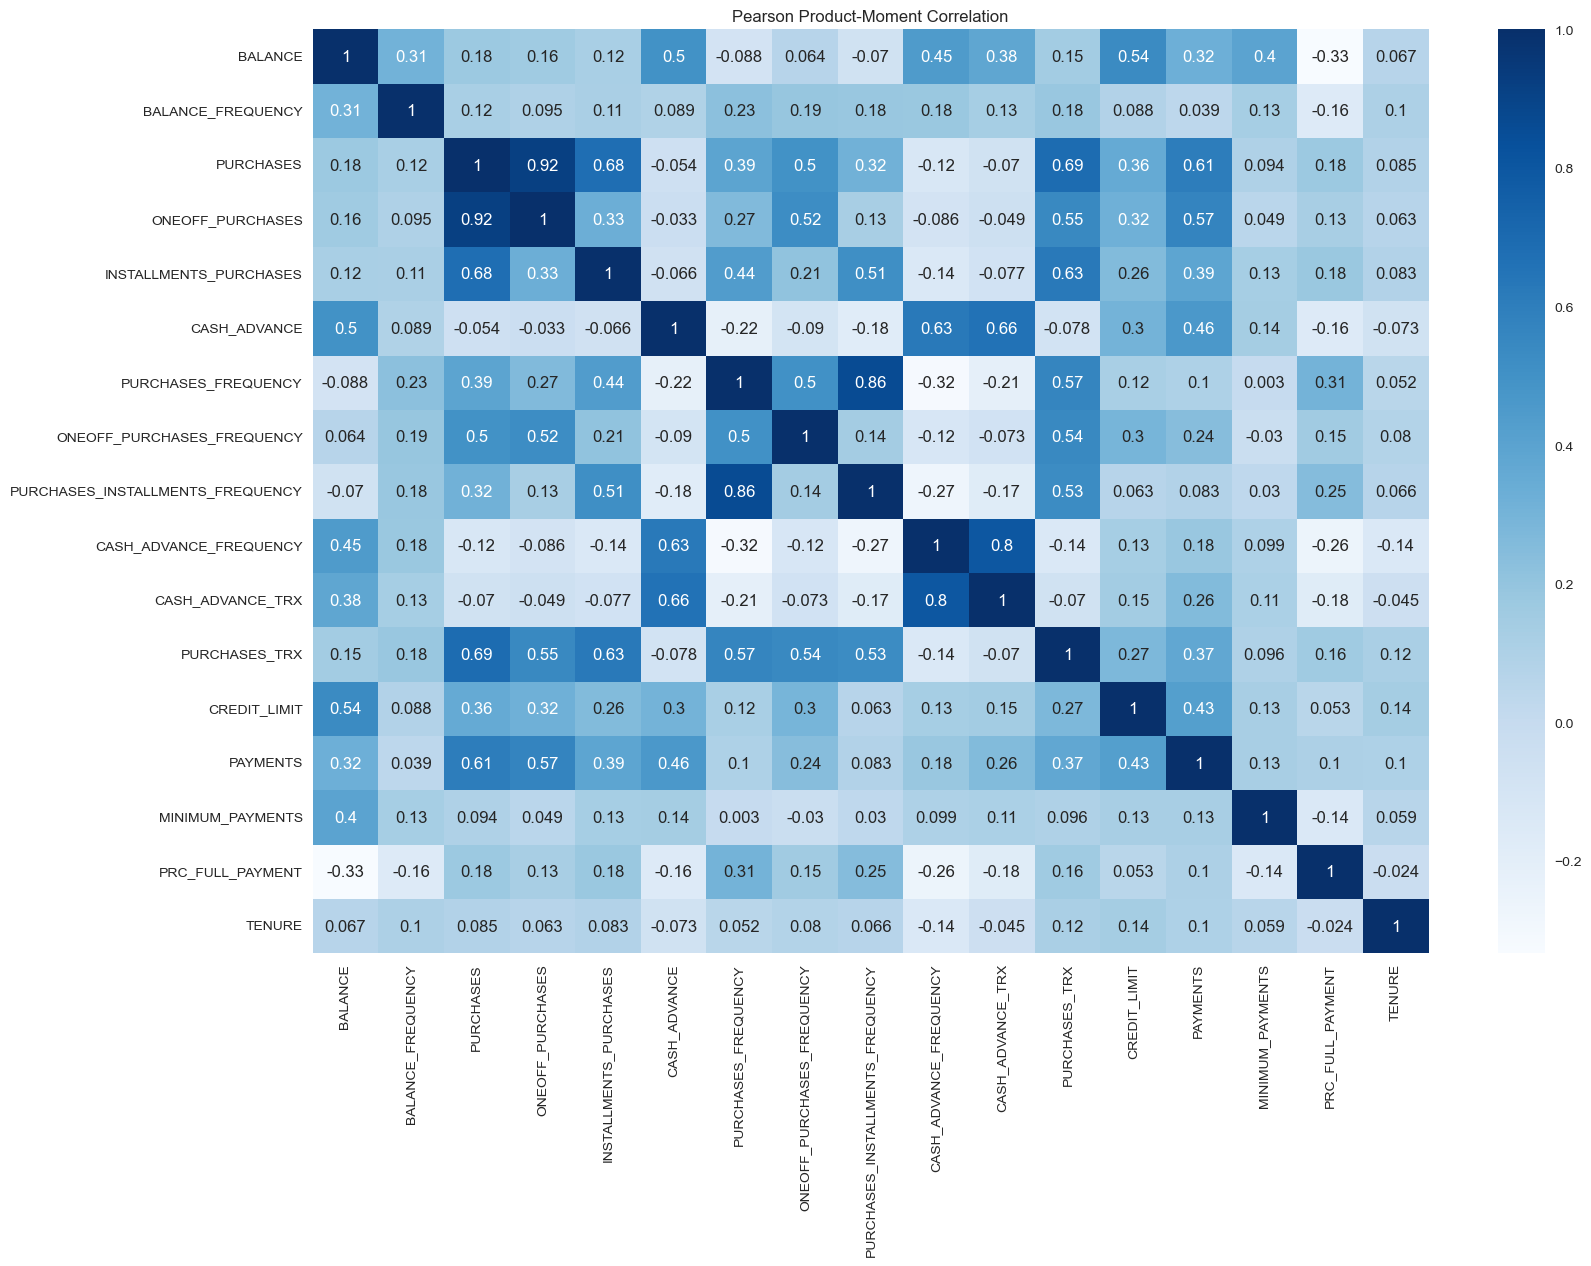

In [10]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(dtf.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=90)
plt.title("Pearson Product-Moment Correlation")
plt.show()

In [11]:
dtf.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


Dari Matriks Korelasi di atas, dapat diketahui
* BALANCE dan CASH_ADVANCE (0.50):
Terdapat korelasi positif yang kuat antara saldo (BALANCE) dan jumlah penarikan uang tunai (CASH_ADVANCE). Pelanggan dengan saldo tinggi cenderung melakukan lebih banyak penarikan uang tunai.

* PURCHASES dan ONEOFF_PURCHASES (0.92): 
Terdapat korelasi positif yang sangat kuat antara total pembelian (PURCHASES) dan pembelian satu kali (ONEOFF_PURCHASES). Pelanggan yang sering melakukan pembelian satu kali juga cenderung melakukan lebih banyak pembelian secara umum.

* PURCHASES dan INSTALLMENTS_PURCHASES (0.68):
Korelasi positif yang kuat antara total pembelian (PURCHASES) dan pembelian dengan angsuran (INSTALLMENTS_PURCHASES). Pelanggan yang sering melakukan pembelian umumnya juga cenderung melakukan lebih banyak pembelian dengan angsuran.

* CASH_ADVANCE dan CASH_ADVANCE_TRX (0.66):
Terdapat korelasi positif yang kuat antara jumlah penarikan uang tunai (CASH_ADVANCE) dan jumlah transaksi penarikan uang tunai (CASH_ADVANCE_TRX). Pelanggan yang sering melakukan penarikan uang tunai cenderung memiliki lebih banyak transaksi penarikan uang tunai.

* PURCHASES dan PURCHASES_TRX (0.69):
Korelasi positif yang kuat antara total pembelian (PURCHASES) dan jumlah transaksi pembelian (PURCHASES_TRX). Pelanggan yang sering melakukan pembelian umumnya juga cenderung memiliki lebih banyak transaksi pembelian.

* CREDIT_LIMIT dan BALANCE (0.54):
Korelasi positif antara batas kredit (CREDIT_LIMIT) dan saldo (BALANCE). Pelanggan dengan batas kredit yang lebih tinggi cenderung memiliki saldo yang lebih tinggi.

* PAYMENTS dan PURCHASES (0.61):
Terdapat korelasi positif yang cukup kuat antara pembayaran (PAYMENTS) dan total pembelian (PURCHASES). Pelanggan yang sering melakukan pembelian umumnya juga cenderung melakukan pembayaran lebih besar.

* MINIMUM_PAYMENTS dan BALANCE (0.40):
Korelasi positif antara pembayaran minimum (MINIMUM_PAYMENTS) dan saldo (BALANCE). Pelanggan dengan saldo yang lebih tinggi cenderung memiliki pembayaran minimum yang lebih tinggi.

* PRC_FULL_PAYMENT dan BALANCE (-0.33):
Korelasi negatif antara proporsi pembayaran penuh (PRC_FULL_PAYMENT) dan saldo (BALANCE). Pelanggan yang cenderung membayar saldo penuh memiliki saldo yang lebih rendah.

* BALANCE_FREQUENCY dan CASH_ADVANCE_FREQUENCY (0.31):
Korelasi positif antara frekuensi pembaruan saldo (BALANCE_FREQUENCY) dan frekuensi penarikan uang tunai (CASH_ADVANCE_FREQUENCY). Pelanggan yang sering memperbarui saldo juga cenderung melakukan lebih banyak penarikan uang tunai.

Selanjutnya adalah melihat periode waktu di mana pemegang kartu kredit telah menjadi pelanggan.

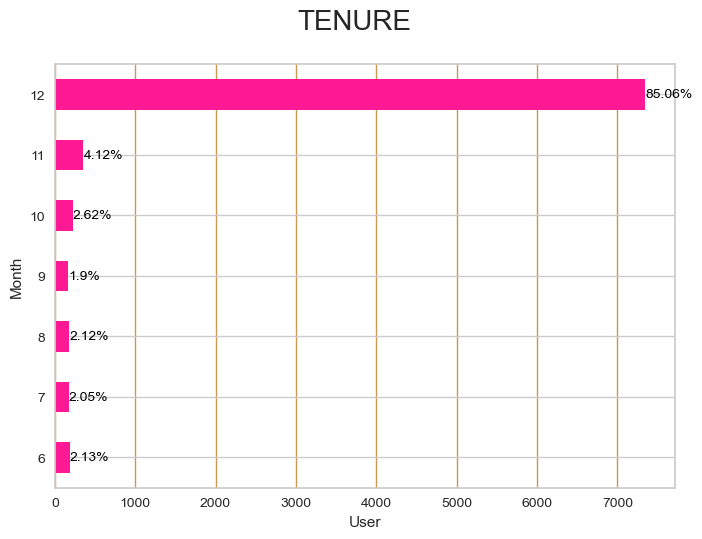

In [12]:
# Menampilkan banyaknya pelanggan pemegang kartu kredit dalam tiap periode
x = "TENURE"
sorted_counts = dtf[x].value_counts().sort_index()  
ax = sorted_counts.plot(kind="barh", color='#FF1994')

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.20,
            str(round((i.get_width() / total) * 100, 2)) + '%',
            fontsize=10, color='black')

ax.grid(axis="x", color='#CC974E')
plt.suptitle(x, fontsize=20)
plt.xlabel('User')
plt.ylabel('Month')
plt.show()

Dari hasi plot di atas, diketahui periode waktu 12 bulan menjadi periode yang paling banyak dipilih pelanggan dalam memegang kartu kredit.

Selanjutnya adalah melihat credit limit yang banyak dipilih pelanggan.

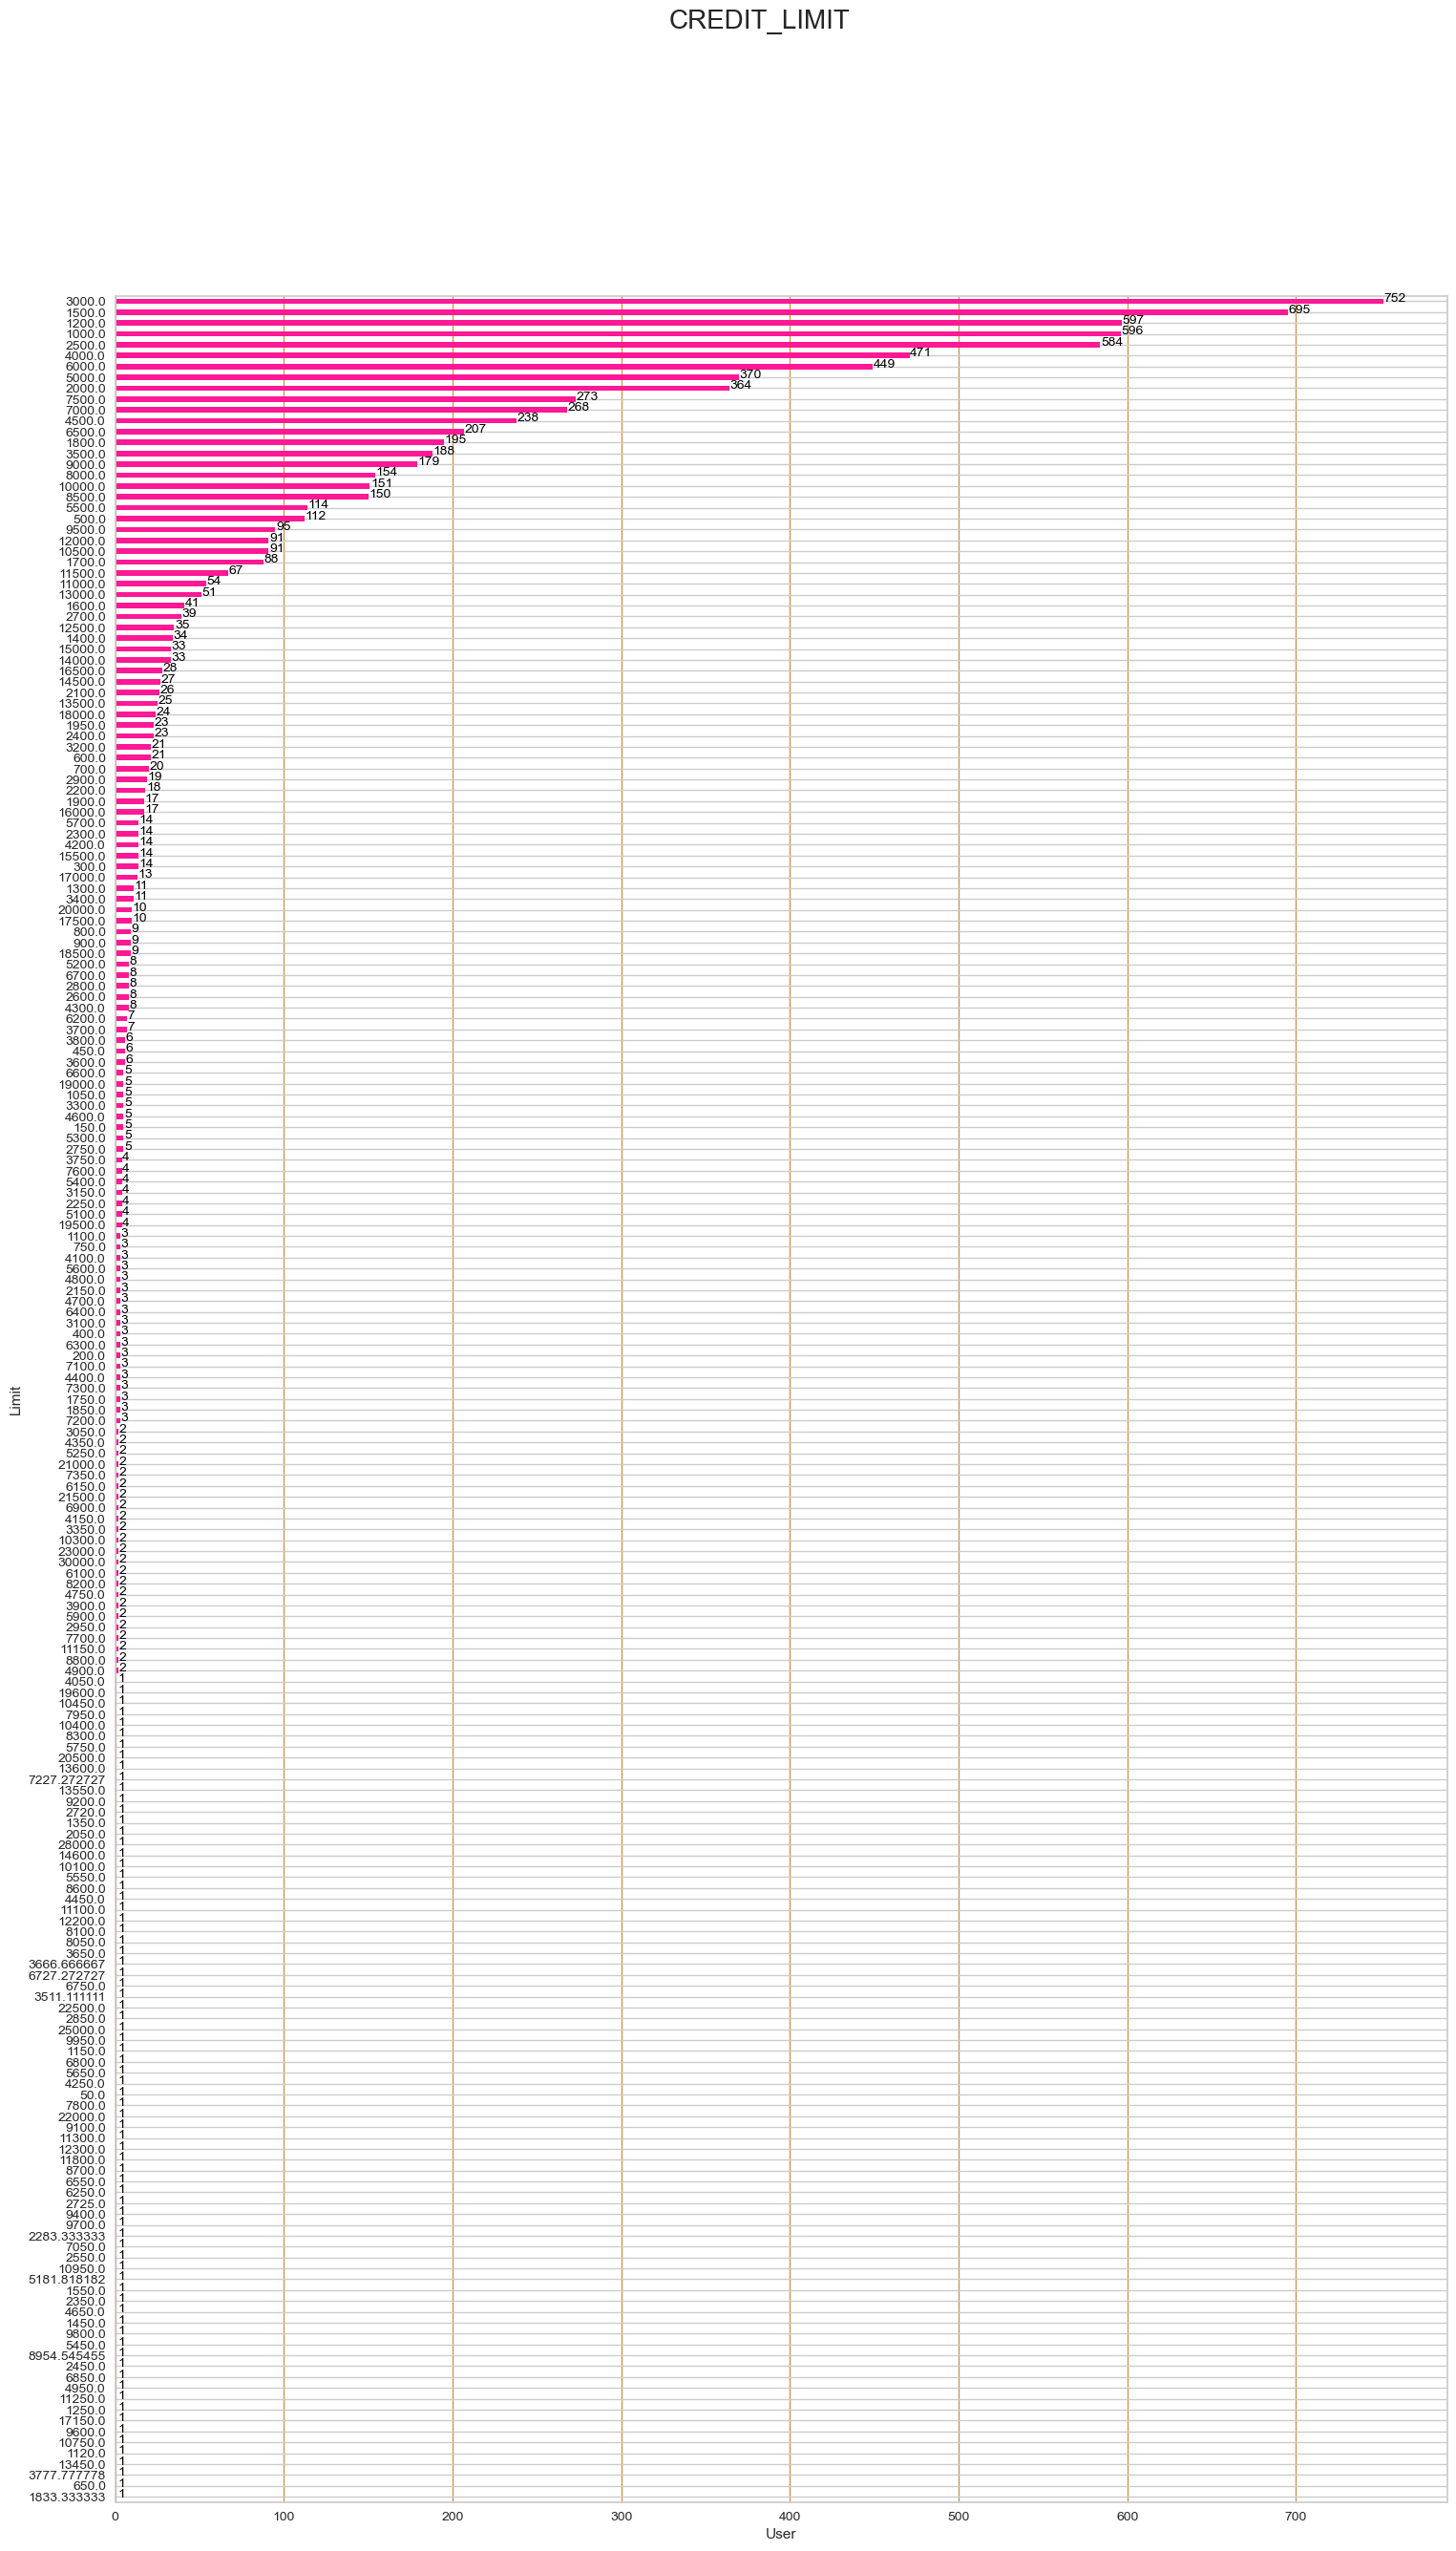

In [13]:
# Menampilkan bar plot credit limit
import matplotlib.pyplot as plt

x = "CREDIT_LIMIT"
ax = dtf[x].value_counts().sort_values().plot(kind="barh", color='#FF1994', figsize=(18, 30))
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.2,
            str(round(i.get_width())),  # Corrected this line
            fontsize=10, color='black')
ax.grid(axis="x", color='#CC974E')
plt.suptitle(x, fontsize=20)
plt.xlabel('User')
plt.ylabel('Limit')
plt.show()

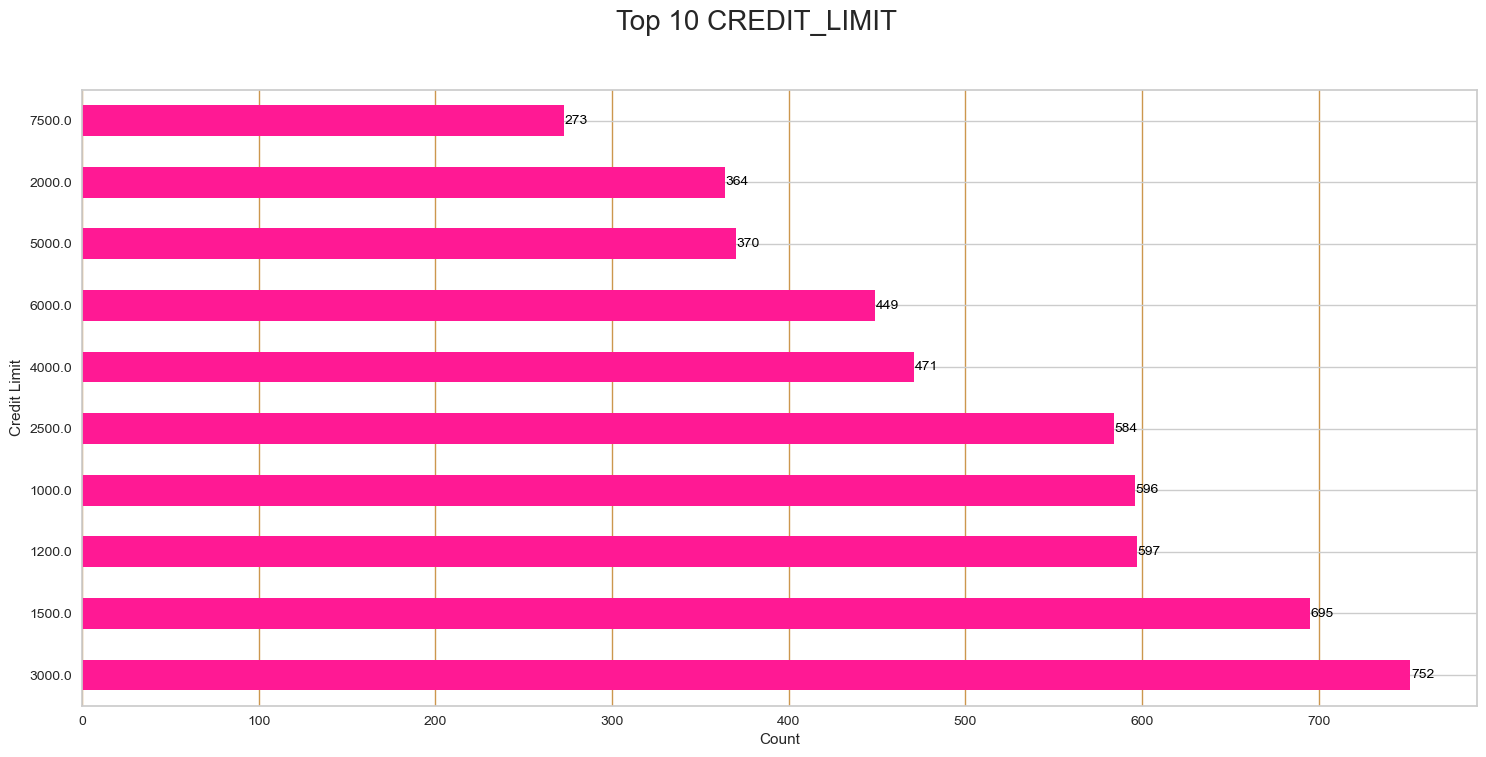

In [14]:
# Menampilkan bar plot credit limit untuk 10 teratas
import matplotlib.pyplot as plt

x = "CREDIT_LIMIT"
top_10_credit_limits = dtf[x].value_counts().sort_values(ascending=False).head(10)
ax = top_10_credit_limits.plot(kind="barh", color='#FF1994', figsize=(18, 8))

for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.2,
            str(round(i.get_width())),
            fontsize=10, color='black')

ax.grid(axis="x", color='#CC974E')
plt.suptitle(f'Top 10 {x}', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Credit Limit')
plt.show()

Dari hasil tersebut, dapat dilihat bahwa credit limit yang banyak dipilih pelanggan kartu kredit adalah 3000 dengan total pengguna sebanyak 752 pelanggan.

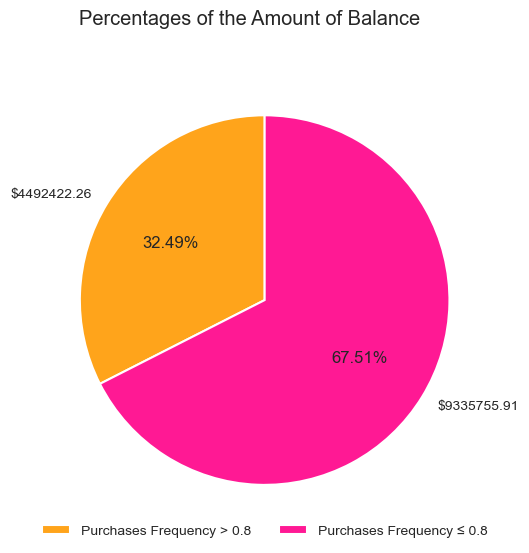

In [15]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first pie chart
patches, texts, pcts = ax.pie(
    [dtf[dtf["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(), dtf[dtf["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum()],
    labels=[f'${round(dtf[dtf["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),2)}',
            f'${round(dtf[dtf["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum(),2)}'],
    startangle=90,
    colors=["#FFA41B", "#FF1994"],
    autopct="%.2f%%",
    wedgeprops={"linewidth": 1.5, "edgecolor": "white"}
)

plt.suptitle("Percentages of the Amount of Balance")
plt.legend(patches, ["Purchases Frequency > 0.8", "Purchases Frequency ≤ 0.8"], ncol=2, bbox_to_anchor=(0.5, 0), loc="center")

plt.show()

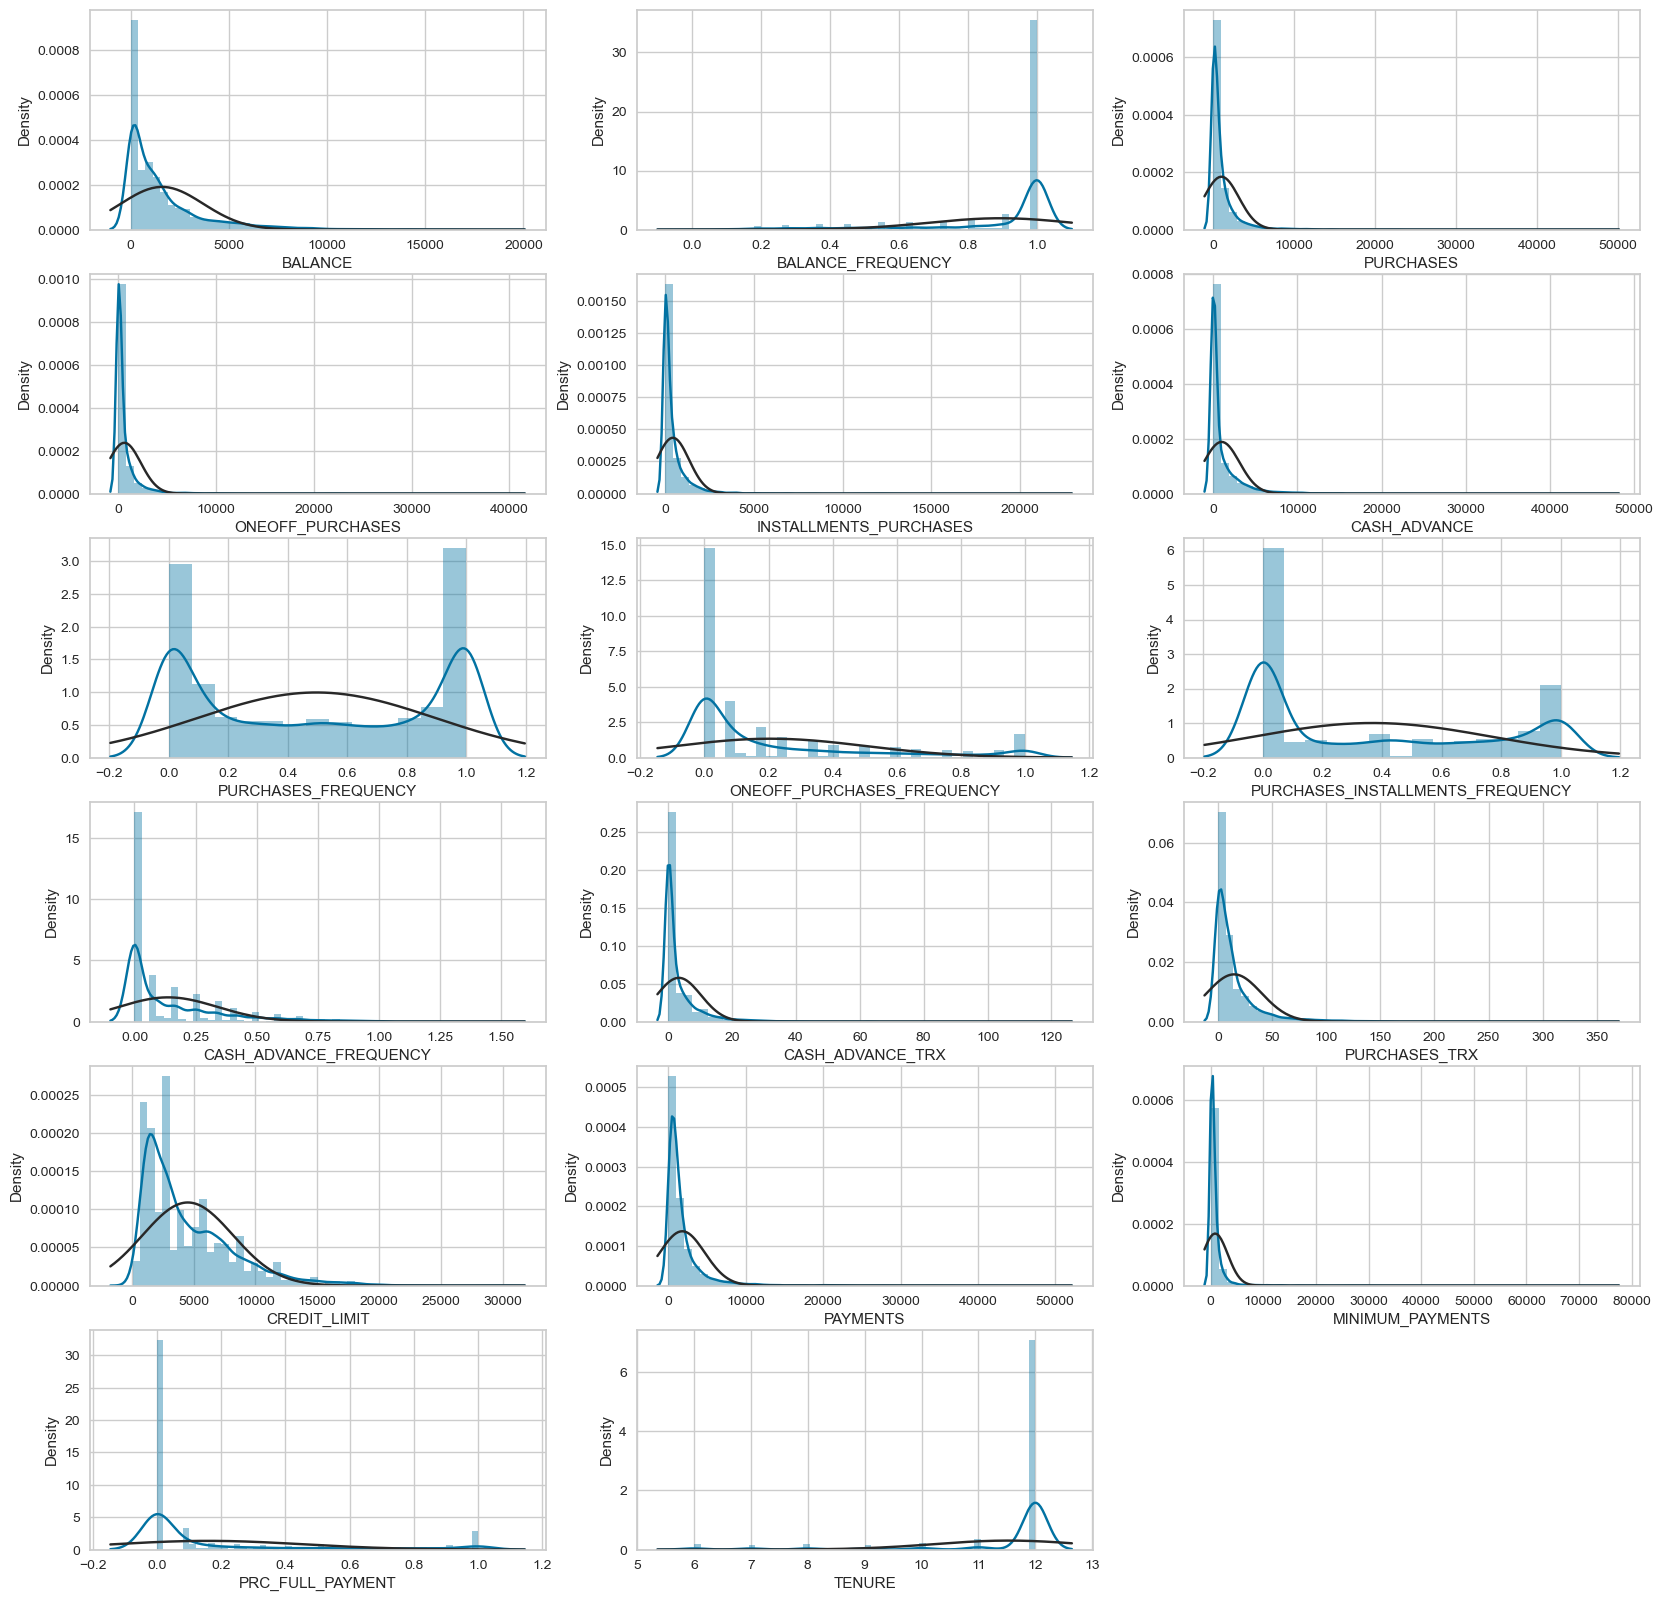

In [16]:
from scipy.stats import norm

plt.figure(figsize=(20,20))
for i, col in enumerate(dtf.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.distplot(dtf[col], ax=ax, fit=norm)
    plt.xlabel(col)
plt.show()

Selanjutnya adalah melihat outlier pada dataset menggunakan boxplot.

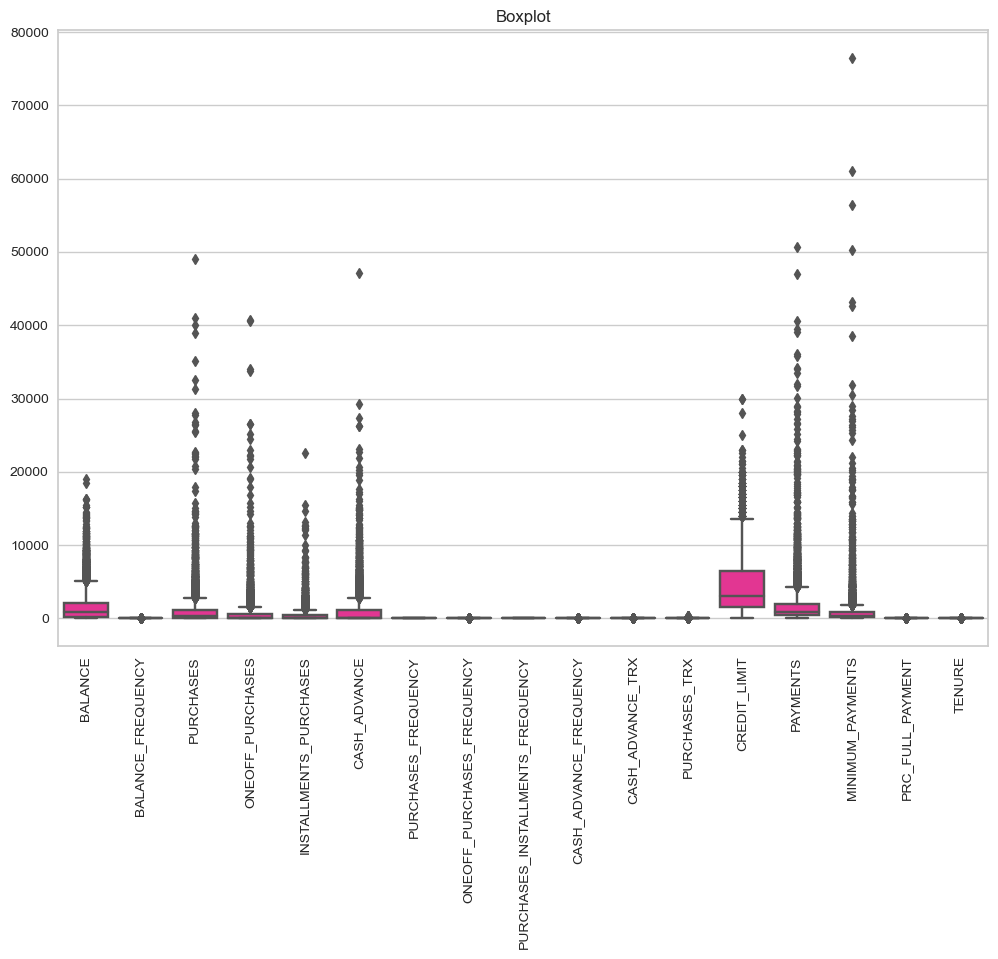

In [17]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(dtf, showfliers=True, color='#FF1994')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

Dari boxplot di atas terdapat variabel yang memiliki nilai outlier. Outlier pada data tersebut dibiarkan saja dikarenakan Outlier mungkin saja membawa informasi yang bernilai. Terkadang, outlier mencerminkan variasi atau perilaku yang signifikan dalam data. Menghapusnya dapat menyebabkan kehilangan informasi penting atau pola yang sebenarnya relevan. Beberapa algoritma pengelompokan, seperti K-Means, dapat sangat dipengaruhi oleh adanya outlier. Namun, beberapa algoritma, terutama yang lebih tahan terhadap outlier seperti K-Medoids.

# 6. Persiapan Data

Sebelum melakukan clustering, kita akan melakukan analisis komponen utama untuk menghasilkan variabel-variabel baru yang dapat mewakilkan variabel-variabel dari dataset tersebut dikarenakan dataset tersebut memiliki jumlah variabel yang cukup banyak. Langkah pertama yang di lakukan adalah mentrasformasikan dataset tersebut agar menghasilkan variabel-variabel yang seragam. Transformasi juga data dapat membantu mengurangi dampak outlier. 

In [18]:
# Transformasi data menggunakan zscore
dtf_t = dtf.copy().apply(zscore,ddof=1)
dtf_t.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516
1,0.764108,0.067675,-0.473181,-0.359139,-0.458812,2.568408,-1.236067,-0.686240,-0.926468,0.556990,0.099252,-0.597020,0.677165,0.796806,0.087684,0.212368,0.35516
2,0.426578,0.505375,-0.116406,0.099904,-0.458812,-0.468628,1.256004,2.646498,-0.926468,-0.681913,-0.479409,-0.120460,0.813805,-0.399480,-0.099900,-0.537696,0.35516
3,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.35516
4,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.35516
5,-0.464773,0.505375,2.798927,3.442203,0.291674,-0.468628,1.256004,2.646498,1.585508,-0.681913,-0.479409,1.944633,2.453490,1.570493,-0.280809,2.837593,0.35516
6,0.106142,0.505375,-0.271899,-0.359139,0.016742,-0.468628,1.256004,-0.686240,1.585508,-0.681913,-0.479409,-0.120460,-0.607255,-0.379892,-0.140047,-0.537696,0.35516
7,-0.279780,0.505375,-0.075651,0.033598,-0.240768,-0.468628,-0.405378,-0.408513,-0.298474,-0.681913,-0.479409,-0.398453,0.677165,-0.376725,-0.232803,-0.537696,0.35516
8,-0.691458,-1.683126,0.118206,0.401767,-0.458812,-0.468628,-0.820721,-0.130782,-0.926468,-0.681913,-0.479409,-0.477880,1.770288,-0.212972,-0.322015,-0.537696,0.35516
9,-0.147024,0.505375,-0.048597,-0.359139,0.544322,-0.468628,1.256004,-0.686240,1.585508,-0.681913,-0.479409,-0.120460,-0.907864,-0.240970,0.551467,-0.537696,0.35516


Selanjutnya adalah melakukan analisis komponen utama dengan menggunakan nilai eigen.

Langkah pertama yang dilakukan adalah mencari matriks kovariansi dari data tersebut.

## Eigen Value

In [19]:
# Mencari Matriks Kovariansi
data_cov = np.cov(dtf_t, rowvar=False)  # rowvar=False mengindikasikan bahwa setiap kolom adalah suatu variabel
data_cov

array([[ 1.        ,  0.31014045,  0.17608309,  0.15998462,  0.12210872,
         0.49558562, -0.08845944,  0.06383163, -0.06958199,  0.44530716,
         0.38238845,  0.14788721,  0.53551818,  0.32283   ,  0.39866892,
        -0.33359378,  0.06698709],
       [ 0.31014045,  1.        ,  0.12263475,  0.09525421,  0.11473904,
         0.08903585,  0.22815802,  0.18746742,  0.18415944,  0.18113216,
         0.13326522,  0.18309471,  0.08768229,  0.0391691 ,  0.13251925,
        -0.1569608 ,  0.10471441],
       [ 0.17608309,  0.12263475,  1.        ,  0.91678022,  0.6792589 ,
        -0.05376022,  0.39299969,  0.49738407,  0.31602493, -0.12486256,
        -0.07027723,  0.68873161,  0.3584254 ,  0.60678236,  0.093842  ,
         0.17644722,  0.08454519],
       [ 0.15998462,  0.09525421,  0.91678022,  1.        ,  0.32964963,
        -0.03324436,  0.26546048,  0.52451406,  0.12837981, -0.08641311,
        -0.04870521,  0.54531267,  0.32061345,  0.57085035,  0.04874124,
         0.12988997

Setelah mendapatkan matriks kovarians, langkahnya selanjutnya adalah mencari matriks korelasi dari dataset tersebut.

In [20]:
# Mencari Matriks Korelasi
data_corr = np.corrcoef(dtf_t, rowvar=False)  # rowvar=False mengindikasikan bahwa setiap kolom adalah suatu variabel
print("Matriks Korelasi:\n", data_corr)

Matriks Korelasi:
 [[ 1.          0.31014045  0.17608309  0.15998462  0.12210872  0.49558562
  -0.08845944  0.06383163 -0.06958199  0.44530716  0.38238845  0.14788721
   0.53551818  0.32283     0.39866892 -0.33359378  0.06698709]
 [ 0.31014045  1.          0.12263475  0.09525421  0.11473904  0.08903585
   0.22815802  0.18746742  0.18415944  0.18113216  0.13326522  0.18309471
   0.08768229  0.0391691   0.13251925 -0.1569608   0.10471441]
 [ 0.17608309  0.12263475  1.          0.91678022  0.6792589  -0.05376022
   0.39299969  0.49738407  0.31602493 -0.12486256 -0.07027723  0.68873161
   0.3584254   0.60678236  0.093842    0.17644722  0.08454519]
 [ 0.15998462  0.09525421  0.91678022  1.          0.32964963 -0.03324436
   0.26546048  0.52451406  0.12837981 -0.08641311 -0.04870521  0.54531267
   0.32061345  0.57085035  0.04874124  0.12988997  0.06339986]
 [ 0.12210872  0.11473904  0.6792589   0.32964963  1.         -0.06609907
   0.44119344  0.21182881  0.5111303  -0.13645481 -0.0767158   

Selanjutnya adalah menghitung nilai eigen dengan menggunakan fungsi numpy 'np.linalg.eig'.

In [21]:
# Menghitung eigen values
eigenvalues, eigenvectors = np.linalg.eig(data_corr)

In [22]:
# Menampilkan nilai eigen
eigenvalues

array([4.62930009e+00, 3.46363229e+00, 1.51611673e+00, 1.28751346e+00,
       1.06702509e+00, 9.71173642e-01, 8.35751939e-01, 7.15824825e-01,
       6.25888438e-01, 5.23856343e-01, 4.01846616e-01, 3.01671735e-01,
       2.42540745e-01, 2.00372153e-01, 1.71376520e-01, 4.60976542e-02,
       1.17307815e-05])

In [23]:
# Menampilkan vektor eigen
eigenvectors

array([[ 9.19859010e-02,  4.05978695e-01,  1.74155217e-01,
         2.59423071e-01, -7.57004044e-02, -3.57631261e-02,
        -2.63369495e-01, -1.99909116e-01, -6.19775069e-02,
        -4.50758324e-02, -1.50517943e-01, -4.76039343e-01,
        -5.37763599e-01,  1.42931091e-01, -2.18995945e-01,
        -5.69792767e-03, -4.23479327e-05],
       [ 1.09812179e-01,  1.27738729e-01,  4.58853339e-01,
         1.59320112e-01,  4.50859056e-01,  1.46533871e-02,
         9.86748293e-02,  1.27517815e-01, -6.71245912e-01,
         2.66496872e-02,  1.39222947e-01,  6.73533962e-02,
         1.68748827e-01, -2.32071695e-02, -4.36486470e-02,
        -9.37862507e-03, -2.19641068e-05],
       [ 4.12151230e-01,  4.95302978e-02, -2.42581867e-01,
         6.40016819e-02,  1.04100032e-02, -1.95992497e-01,
         2.01357228e-01, -4.96132634e-03, -1.01273223e-01,
        -5.93350230e-02, -1.96411444e-01,  7.90082930e-02,
        -1.08711289e-01, -2.24677700e-01,  6.28764571e-02,
         1.48477975e-03,  7.4

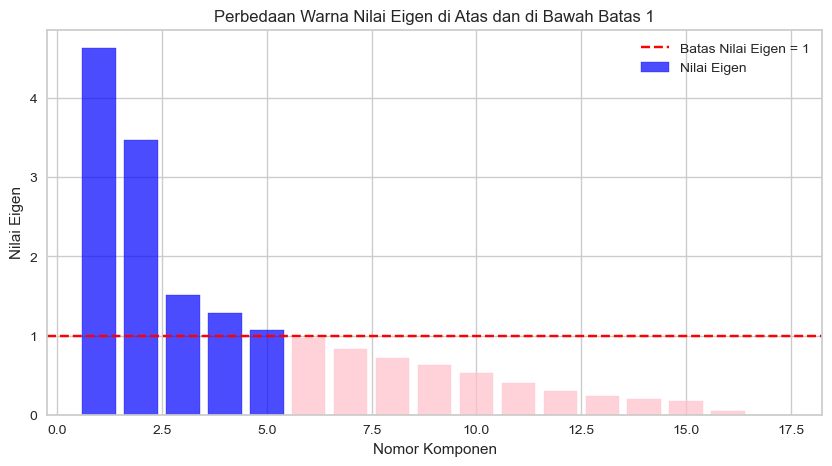

In [24]:
# Menentukan batas nilai eigen untuk perbedaan warna
threshold_value = 1

# Plot nilai eigen dengan perbedaan warna
plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, align='center', label='Nilai Eigen')

# Mewarnai batang diagram di atas dan di bawah threshold
for bar in bars:
    if bar.get_height() > threshold_value:
        bar.set_color('blue')  # Warna untuk nilai eigen di atas threshold
    else:
        bar.set_color('pink')  # Warna untuk nilai eigen di bawah threshold

# Garis horizontal pada nilai eigen 1
plt.axhline(y=threshold_value, color='red', linestyle='--', label='Batas Nilai Eigen = 1')

plt.xlabel('Nomor Komponen')
plt.ylabel('Nilai Eigen')
plt.title('Perbedaan Warna Nilai Eigen di Atas dan di Bawah Batas 1')
plt.legend()
plt.show()

In [25]:
# Fit factor analysis model
fa = FactorAnalyzer(rotation="varimax",method="principal")
fa.fit(dtf_t)

# Threshold for highlighting
threshold_value = 1

# Create DataFrame with eigenvalues and variance explained
total_variance_explained = pd.DataFrame({
    "Component": range(1, len(fa.get_eigenvalues()[0]) + 1),
    "Eigenvalue": fa.get_eigenvalues()[0],
    "% of Variance": fa.get_eigenvalues()[0] / len(dtf_t.columns) * 100
}).set_index("Component")
total_variance_explained["Cumulative"] = total_variance_explained["% of Variance"].cumsum()

# Highlight rows based on eigenvalue
def highlight_rows(row):
    value = row.loc["Eigenvalue"]
    if value > threshold_value:
        color = "#FAC2C1"  # Red color for eigenvalue greater than 1
    else:
        color = "#FA889E"  # Orange color for eigenvalue not greater than 1
    return ["background-color: {}".format(color) for r in row]

# Apply the style function to highlight rows
styled_variance_explained = total_variance_explained.style.apply(highlight_rows, axis=1)
styled_variance_explained

,Eigenvalue,% of Variance,Cumulative
Component,,,
1,4.629300,27.231177,27.231177
2,3.463632,20.374308,47.605485
3,1.516117,8.918334,56.523818
4,1.287513,7.573609,64.097427
5,1.067025,6.276618,70.374045
6,0.971174,5.712786,76.086831
7,0.835752,4.916188,81.003019
8,0.715825,4.210734,85.213753
9,0.625888,3.681697,88.895450


Dari hasil di atas, diketahui terdapat 5 nilai eigen yang nilainya > 1. Sehingga terdapat 5 komponen utama yang dapat mewakili 17 variabel pada dataset tersebut.

In [26]:
# Analisis Faktor
fa_5 = FactorAnalyzer(n_factors=5,rotation="varimax",method="principal")
fa_5.fit(dtf_t)

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

In [27]:
rotated_component_matrix = pd.DataFrame(
    data=fa_5.loadings_,
    columns=[f"Component {component + 1}" for component in range(fa_5.n_factors)],
    index=dtf_t.columns
)
rotated_component_matrix

,Component 1,Component 2,Component 3,Component 4,Component 5
BALANCE,0.227475,0.523886,-0.060145,0.594524,0.255954
BALANCE_FREQUENCY,0.049512,0.157904,0.223390,0.148993,0.762657
PURCHASES,0.884665,-0.060941,0.299793,0.105016,-0.047183
ONEOFF_PURCHASES,0.912430,-0.069261,0.042115,-0.007289,0.037106
INSTALLMENTS_PURCHASES,0.414613,-0.016886,0.631283,0.261577,-0.179850
CASH_ADVANCE,0.065702,0.856693,-0.097051,0.120192,-0.075990
PURCHASES_FREQUENCY,0.220248,-0.188748,0.848001,-0.118278,0.227714
ONEOFF_PURCHASES_FREQUENCY,0.672939,-0.128112,0.159978,-0.216886,0.414639
PURCHASES_INSTALLMENTS_FREQUENCY,0.025414,-0.118729,0.933708,0.027648,0.056552
CASH_ADVANCE_FREQUENCY,-0.056596,0.865555,-0.181987,-0.021120,0.174385


Selanjutnya melihat variabel-variabel mana saja yang masuk dalam setiap komponen utama.

In [28]:
factors = []
for variable in rotated_component_matrix.index:
    for index,value in enumerate(rotated_component_matrix.loc[variable],start=1):
        if abs(value) == np.max(np.array(abs(rotated_component_matrix.loc[variable]))):
            factors.append(index)

factor_1,factor_2,factor_3,factor_4,factor_5 = ([] for _ in range(fa_5.n_factors))
for variable,factor in zip(rotated_component_matrix.index,factors):
    if factor == 1:
        factor_1.append(variable)
    elif factor == 2:
        factor_2.append(variable)
    elif factor == 3:
        factor_3.append(variable)
    elif factor == 4:
        factor_4.append(variable)
    else:
        factor_5.append(variable)

components = pd.DataFrame(
    data=[factor_1,factor_2,factor_3,factor_4,factor_5],
    index=[f"Component {component + 1}" for component in range(fa_5.n_factors)]
).T
components.replace([None]," ",inplace=True)
components

,Component 1,Component 2,Component 3,Component 4,Component 5
0,PURCHASES,CASH_ADVANCE,INSTALLMENTS_PURCHASES,BALANCE,BALANCE_FREQUENCY
1,ONEOFF_PURCHASES,CASH_ADVANCE_FREQUENCY,PURCHASES_FREQUENCY,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
2,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_INSTALLMENTS_FREQUENCY,TENURE,
3,PURCHASES_TRX,,,,
4,CREDIT_LIMIT,,,,
5,PAYMENTS,,,,


Dari hasil analisis faktor di atas, diketahui bahwa 
* Component 1 : Komponen Pembelian, dengan Variabel 'PURCHASES' memiliki beban yang tinggi pada komponen ini.
* Component 2 : Komponen Pengambilan Uang Tunai, dengan Variabel 'CASH_ADVANCE' memiliki beban yang tinggi pada komponen ini.
* Component 3 : Komponen Cicilan dan Frekuensi Pembelian, dengan Variabel 'INSTALLMENTS_PURCHASES' memiliki beban yang tinggi pada komponen ini.
* Component 4 : Komponen Balance dan Pembayaran, dengan Variabel 'BALANCE', 'MINIMUM_PAYMENTS', dan 'TENURE' memiliki beban pada komponen ini.
* Component 5 : Komponen Frequensi dan Pembayaran Penuh, dengan Variabel 'BALANCE_FREQUENCY' dan  'PRC_FULL_PAYMENT' memiliki beban pada komponen ini.

Selanjutnya adalah menampilkan Dataframe yang berisi nilai faktor untuk setiap observasi.

In [29]:
df_fa = pd.DataFrame(data=fa_5.fit_transform(dtf_t),columns=[f"Component {i + 1}" for i in range(fa_5.n_factors)])
df_fa.head(10)

,Component 1,Component 2,Component 3,Component 4,Component 5
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370
4,-0.595084,-0.556173,0.640184,1.021097,0.057387
5,3.229177,-0.483759,0.843265,-1.093200,-0.147468
6,-0.883212,-0.469488,1.140295,0.377778,0.549957
7,-0.031964,-0.663676,-0.543344,0.417869,0.326966
8,0.619593,-0.785664,-1.326611,0.335996,-1.044187
9,-0.911578,-0.512975,1.329118,0.711471,0.311871


In [30]:
df_fa.tail(10)

,Component 1,Component 2,Component 3,Component 4,Component 5
8626,-0.416567,0.859694,-0.506360,-2.033052,-1.874111
8627,-0.126293,0.341594,-0.515377,-1.985618,0.676659
8628,-0.928491,0.448770,1.955067,-2.330751,-1.019127
8629,-0.731886,3.529939,1.129084,-1.079121,-0.222614
8630,-1.064844,0.255309,1.384168,-1.891093,0.038309
8631,-0.377747,-0.090877,-0.715237,-1.735043,-1.132726
8632,-1.008494,0.323418,1.577968,-2.047203,-0.329579
8633,-0.931340,0.197282,0.997555,-1.852388,-0.503891
8634,-0.582189,0.397432,-0.507620,-1.903179,-0.658830
8635,0.365958,0.470397,-0.359008,-2.546953,0.407751


# 7. Clustering

Pada tahap ini kita akan melakukan proses clustering menggunakan K-Means. Sebelum melakukan clustering kita akan menentukan jumlah cluster yang akan digunakan dengan menggunakan metode Elbow dan Silhaoutte.

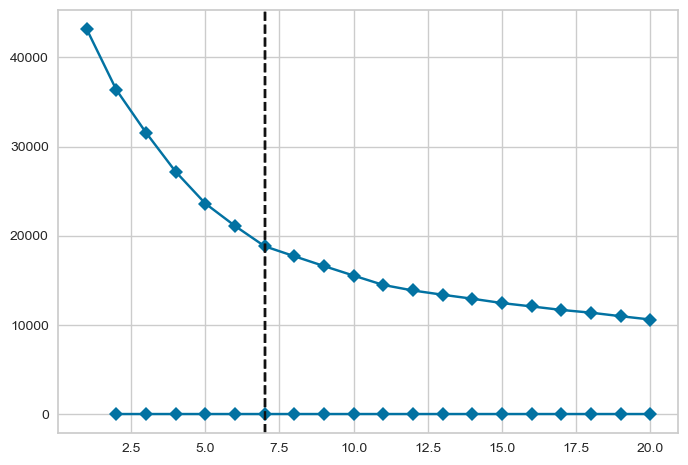

In [31]:
# Analisis Elbow
random_state = 42
start = 1
end = 20

scores,elbows_indexes,elbows_scores,methods = [],[],[],["distortion","silhouette"]

for method in methods:
    if method == "silhouette":
        start = 2
    
    kmeans_model = KMeans(init="k-means++",random_state=random_state)
    visualizer = KElbowVisualizer(kmeans_model,k=(start,end + 1),metric=method,timings=False)
    visualizer.fit(df_fa)
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)

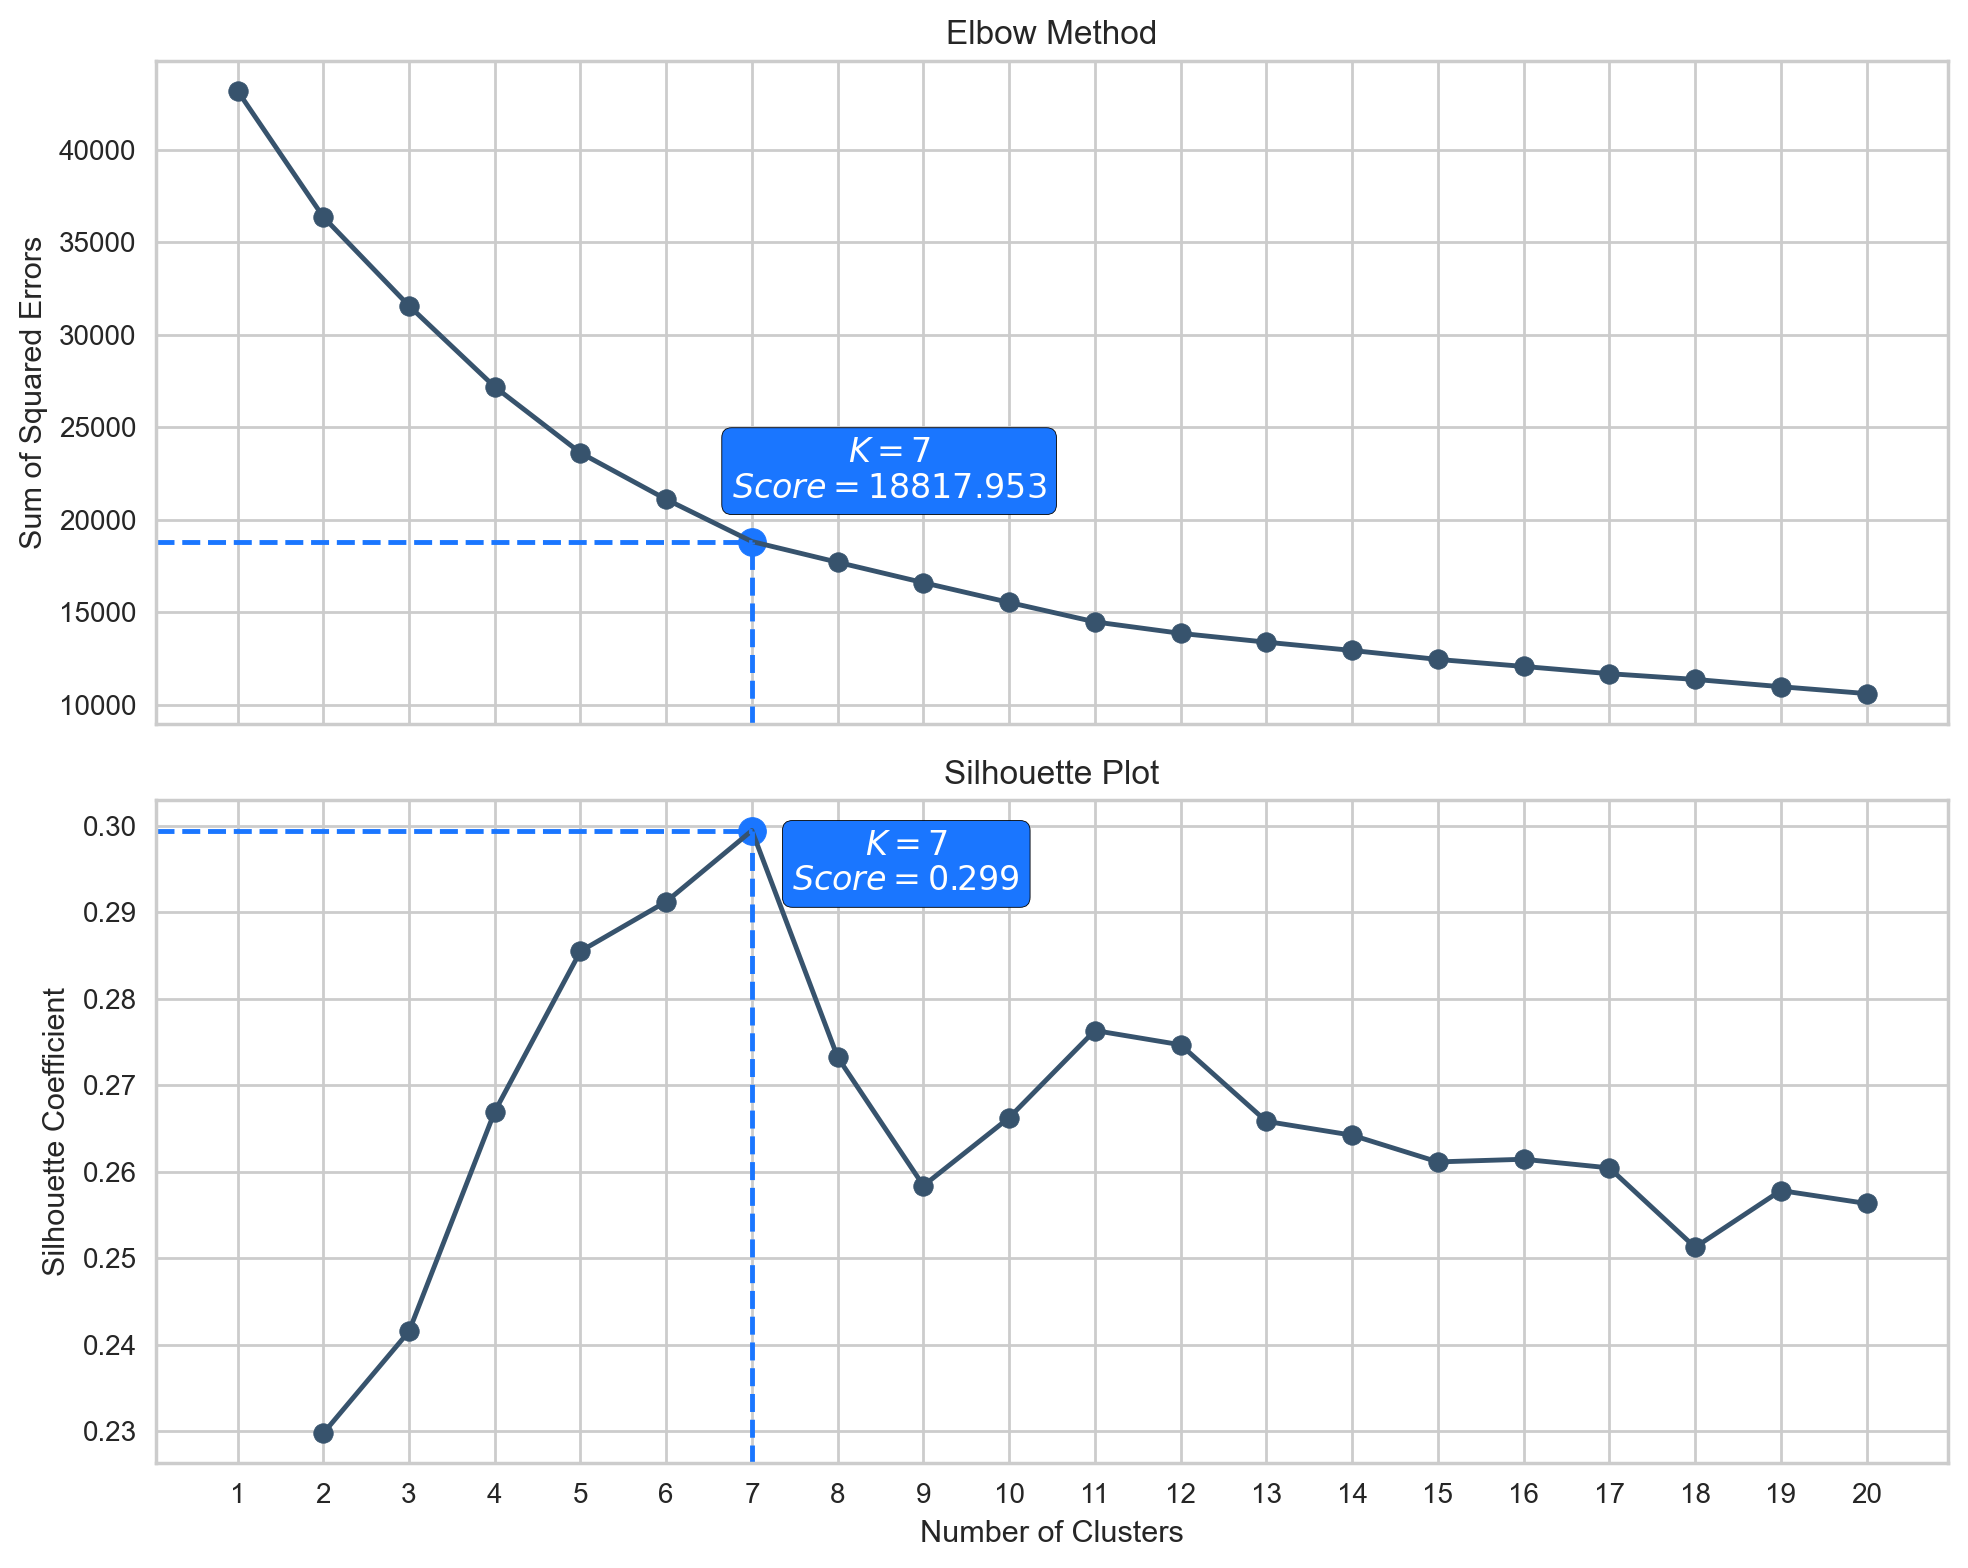

In [32]:
# Visualisasi Metode Elbow dan Metode Silhoutte

start = 1
end = 20

fig,ax = plt.subplots(2,1,figsize=(10,8),dpi=200,sharex=True)

# Elbow Method
ax[0].plot(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(elbows_indexes[0],elbows_scores[0],color="#1a76ff",s=100)
ax[0].set_xticks(range(start,end + 1))

xmin,xmax = ax[0].get_xlim()
ymin,ymax = ax[0].get_ylim()

ax[0].plot((xmin,elbows_indexes[0]),(elbows_scores[0],elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].plot((elbows_indexes[0],elbows_indexes[0]),(ymin,elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[0].set_title("Elbow Method")
ax[0].set_ylabel("Sum of Squared Errors")
ax[0].text(
    x=elbows_indexes[0] + 1.6,
    y=elbows_scores[0] + 2_000,
    horizontalalignment="center",
    verticalalignment="bottom",
    s=f"$ K = {elbows_indexes[0]} $\n$ Score = {round(elbows_scores[0],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round"),
)

# Silhouette Plot
ax[1].plot(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(elbows_indexes[1],elbows_scores[1],color="#1a76ff",s=100)
ax[1].set_xticks(range(start,end + 1))

xmin,xmax = ax[1].get_xlim()
ymin,ymax = ax[1].get_ylim()

ax[1].plot((xmin,elbows_indexes[1]),(elbows_scores[1],elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].plot((elbows_indexes[1],elbows_indexes[1]),(ymin,elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)
ax[1].set_title("Silhouette Plot")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")
ax[1].text(
    x=elbows_indexes[1] + 1.8,
    y=elbows_scores[1],
    horizontalalignment="center",
    verticalalignment="top",
    s=f"$ K = {elbows_indexes[1]} $\n$ Score = {round(elbows_scores[1],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round")
)

plt.tight_layout()
plt.show()

Dari kedua hasil metode tersebut, didapatkan jumlah cluster sebanyak 7 cluster untuk Metode Elbow dan juga Metode Silhouette.

## 7.1 K-Means

K-Means adalah algoritma pengelompokan populer dalam pembelajaran mesin dan penambangan data. Ini adalah algoritma pembelajaran tanpa pengawasan yang membagi dataset menjadi K kelompok, di mana setiap titik data termasuk ke dalam kelompok dengan mean terdekat. Istilah "K" merujuk pada jumlah kelompok yang ingin diidentifikasi oleh algoritma.

In [33]:
kmeans_model = KMeans(n_clusters=7, init='k-means++', random_state=21)
kmeans_model.fit(df_fa)

KMeans(n_clusters=7, random_state=21)

Selanjutnya adalah pembagian cluster berdasarkan karakteristik yang dimiliki tiap data.

In [34]:
# Menambahkan Kolom baru 'KMEANS_SEGMENT' pada Dataframe.
labels = kmeans_model.labels_
cluster_centers = kmeans_model.cluster_centers_
df_kmeans = df_fa.copy()
df_kmeans['KMEANS_SEGMENT'] = labels
df_kmeans.head(10)

,Component 1,Component 2,Component 3,Component 4,Component 5,KMEANS_SEGMENT
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331,1
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249,1
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243,4
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370,1
4,-0.595084,-0.556173,0.640184,1.021097,0.057387,0
5,3.229177,-0.483759,0.843265,-1.093200,-0.147468,4
6,-0.883212,-0.469488,1.140295,0.377778,0.549957,0
7,-0.031964,-0.663676,-0.543344,0.417869,0.326966,1
8,0.619593,-0.785664,-1.326611,0.335996,-1.044187,2
9,-0.911578,-0.512975,1.329118,0.711471,0.311871,0


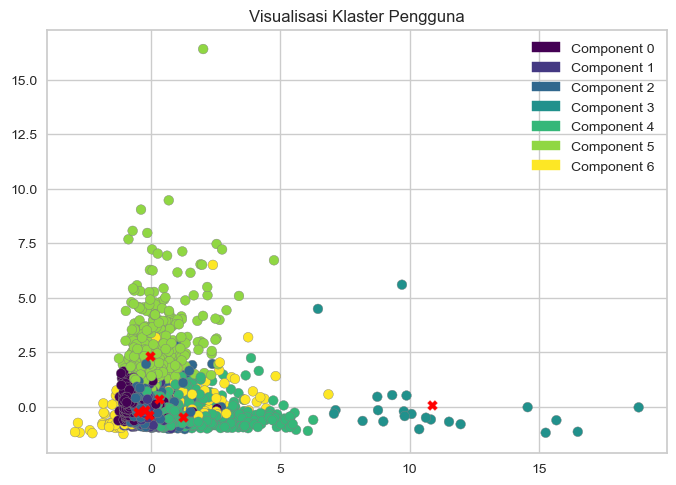

In [35]:
# Mendapatkan jumlah klaster
num_clusters = len(np.unique(labels))

# Menghasilkan colormap berdasarkan jumlah klaster
cmap = plt.cm.get_cmap('viridis', num_clusters)

# Assuming you have df_fa DataFrame and X_pca array defined
plt.scatter(df_fa.iloc[:, 0], df_fa.iloc[:, 1], c=labels, cmap=cmap, edgecolor='gray')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='red')

# Membuat legenda dengan nama klaster
legend_patches = []
for i in range(num_clusters):
    patch = mpatches.Patch(color=cmap(i), label='Component {}'.format(i))
    legend_patches.append(patch)

# Menampilkan legenda
plt.legend(handles=legend_patches)

plt.title('Visualisasi Klaster Pengguna')
plt.show()

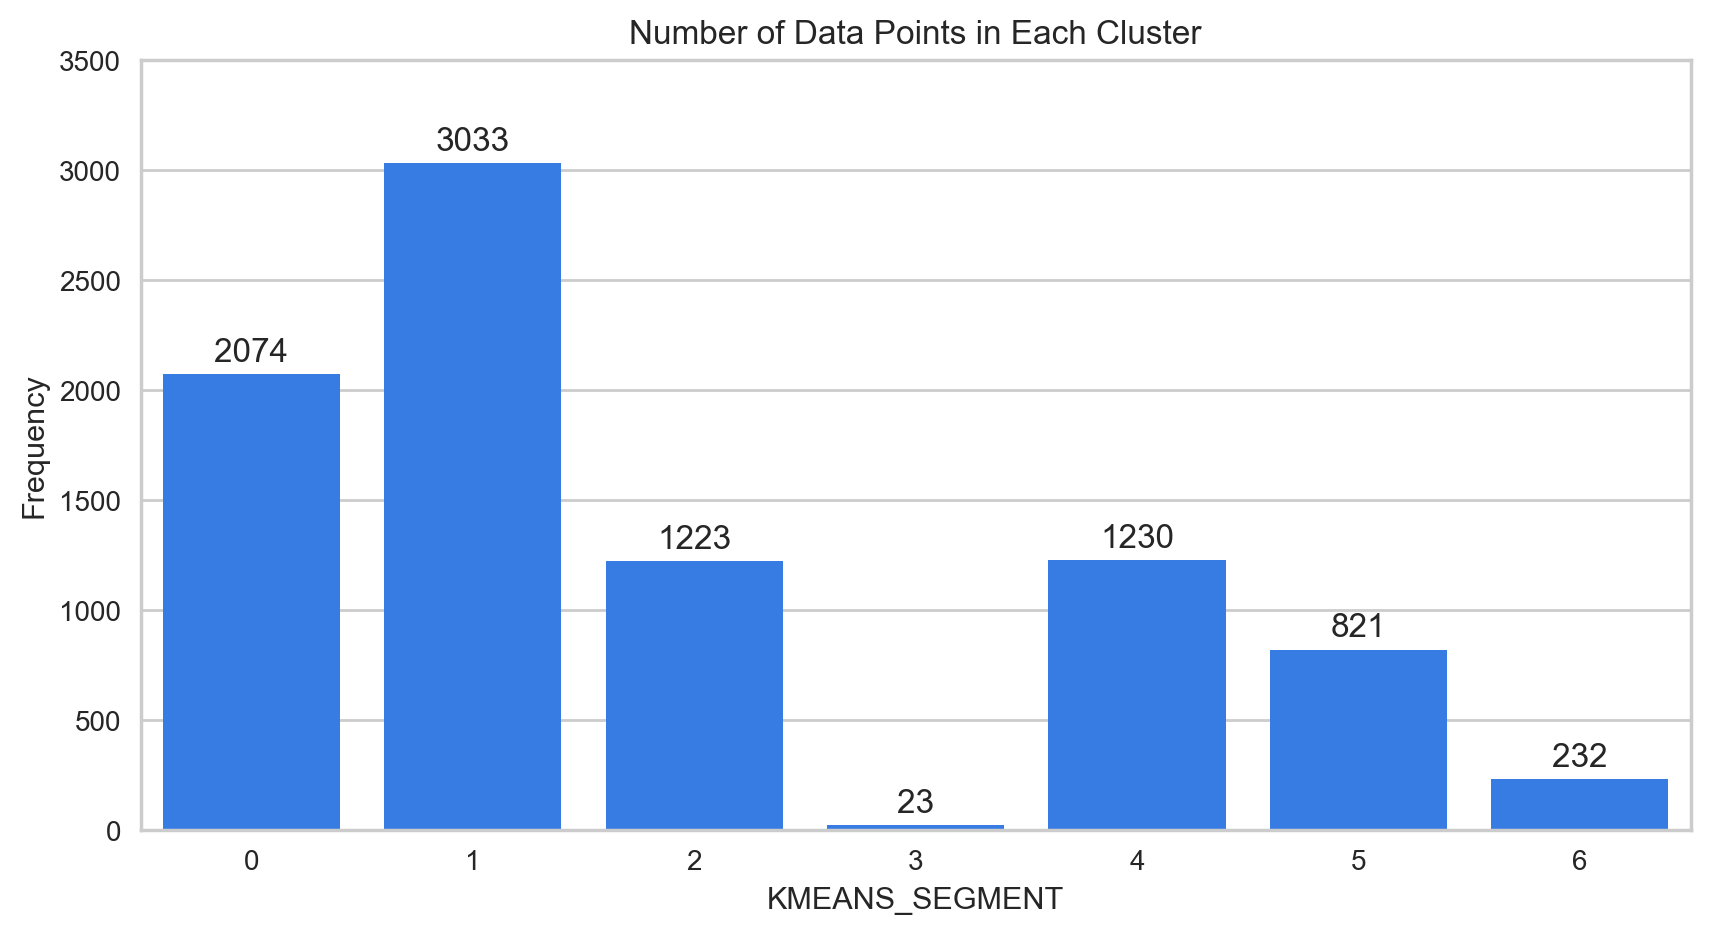

In [36]:
# Menampilkan Count Plot Hasil Clustering
dtf_c= df_kmeans.copy()

fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=dtf_c,x="KMEANS_SEGMENT",color="#1a76ff")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=3500)
ax.set_ylabel("Frequency")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

In [37]:
df_kmeans.groupby('KMEANS_SEGMENT').mean()

,Component 1,Component 2,Component 3,Component 4,Component 5
KMEANS_SEGMENT,,,,,
0,-0.501424,-0.249096,1.196861,-0.142431,0.008818
1,-0.233754,-0.141314,-0.753467,0.212179,0.323483
2,-0.083638,-0.391159,-0.519023,-0.278889,-1.720608
3,10.873363,0.089009,-0.364485,0.942886,-2.887908
4,1.254898,-0.457378,0.253812,-0.513272,0.917710
5,-0.021913,2.316326,-0.157054,-0.217823,0.142241
6,0.325852,0.355349,1.133088,3.368168,-0.320052


Dari hasil di atas, dapat kita lihat bahwa segmen segmen yang dihasilkan memiliki ciri khas tersendiri yang merepresentasikan karakteristik pengguna, diantaranya:
* Cluster 0: **Installment Lover**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung melakukan pembelian installment yang tinggi, yaitu pembelian yang dilakukan dengan cicilan atau pembayaran berkala. Mereka juga memiliki nilai rata-rata balance yang rendah, yang berarti mereka tidak memiliki banyak hutang atau tagihan kartu kredit.
* Cluster 1: **Full Payer**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung membayar seluruh tagihan kartu kredit mereka setiap bulan, yang ditunjukkan oleh nilai rata-rata PRC_FULL_PAYMENT yang tinggi. Mereka juga memiliki nilai rata-rata minimum payments yang rendah, yang berarti mereka tidak memiliki banyak kewajiban pembayaran minimum.
* Cluster 2: **Low Balance**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung memiliki nilai rata-rata balance yang rendah, yang berarti mereka tidak memiliki banyak hutang atau tagihan kartu kredit. Mereka juga memiliki nilai rata-rata balance frequency yang rendah, yang berarti mereka jarang menggunakan kartu kredit mereka.
* Cluster 3: **Big Spender**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung melakukan pembelian yang tinggi, yang ditunjukkan oleh nilai rata-rata purchases yang sangat tinggi. Mereka juga memiliki nilai rata-rata credit limit yang tinggi, yang berarti mereka memiliki batas kredit yang besar untuk melakukan pembelian.
* Cluster 4: **One-off Buyer**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung melakukan pembelian one-off yang tinggi, yaitu pembelian yang dilakukan sekali saja tanpa cicilan atau pembayaran berkala. Mereka juga memiliki nilai rata-rata one-off purchases frequency yang tinggi, yang berarti mereka sering melakukan pembelian one-off.
* Cluster 5: **Cash Advance User**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung menggunakan cash advance yang tinggi, yaitu pinjaman atau kredit yang diberikan oleh kartu kredit. Mereka juga memiliki nilai rata-rata cash advance frequency dan cash advance trx yang tinggi, yang berarti mereka sering menggunakan cash advance.
* Cluster 6: **High Balance**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung memiliki nilai rata-rata balance yang tinggi, yang berarti mereka memiliki banyak hutang atau tagihan kartu kredit. Mereka juga memiliki nilai rata-rata purchases installment frequency yang tinggi, yang berarti mereka sering melakukan pembelian dengan cicilan atau pembayaran berkala.

In [38]:
df_kmeans['LABELS'] = df_kmeans['KMEANS_SEGMENT'].map({0: "Installment Lover",
                                                         1: "Full Payer",
                                                         2: "Low Balance",
                                                         3: "Big Spender",
                                                      4: "One-off Buyer",
                                                      5: "Cash Advance User",
                                                      6: "High Balance"})
df_kmeans

,Component 1,Component 2,Component 3,Component 4,Component 5,KMEANS_SEGMENT,LABELS
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331,1,Full Payer
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249,1,Full Payer
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243,4,One-off Buyer
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370,1,Full Payer
4,-0.595084,-0.556173,0.640184,1.021097,0.057387,0,Installment Lover
...,...,...,...,...,...,...,...
8631,-0.377747,-0.090877,-0.715237,-1.735043,-1.132726,2,Low Balance
8632,-1.008494,0.323418,1.577968,-2.047203,-0.329579,0,Installment Lover
8633,-0.931340,0.197282,0.997555,-1.852388,-0.503891,0,Installment Lover
8634,-0.582189,0.397432,-0.507620,-1.903179,-0.658830,2,Low Balance


In [39]:
count_table = df_kmeans['LABELS'].value_counts().sort_index()
count_table.columns = ['LABELS', 'Count']

print("Pembagian Pengguna Kartu Kredit Berdasarkan Cluster:")
print(count_table)

Pembagian Pengguna Kartu Kredit Berdasarkan Cluster:
Big Spender            23
Cash Advance User     821
Full Payer           3033
High Balance          232
Installment Lover    2074
Low Balance          1223
One-off Buyer        1230
Name: LABELS, dtype: int64


Dari hasil di atas, diketahui bahwa:

1. **Big Spender (Pengeluar Besar)**:
Terdapat 23 pengguna kartu kredit yang cenderung melakukan pengeluaran besar.

2. **Cash Advance User (Pengguna Penarikan Tunai)**:
Sebanyak 821 pengguna kartu kredit cenderung menggunakan fasilitas penarikan tunai.

3. **Full Payer (Pembayar Penuh)**:
Ada 3033 pengguna kartu kredit yang cenderung membayar tagihan mereka secara penuh.

4. **High Balance (Saldo Tinggi)**:
Terdapat 232 pengguna kartu kredit yang memiliki saldo tinggi.

5. **Installment Lover (Penggemar Pembayaran Angsuran)**:
Sebanyak 2074 pengguna kartu kredit cenderung memilih pembayaran dalam bentuk angsuran.

6. **Low Balance (Saldo Rendah)**:
Terdapat 1223 pengguna kartu kredit yang memiliki saldo rendah.

7. **One-off Buyer (Pembeli Satu Kali)**:
Ada 1230 pengguna kartu kredit yang cenderung melakukan pembelian satu kali.

In [41]:
# Menghitung metrik-metrik evaluasi
Inertia = round(kmeans_model.inertia_, 7)
silhouette_avg_kmeans = round(silhouette_score(df_fa, labels), 7)
davies_bouldin_kmeans = round(davies_bouldin_score(df_fa, labels), 7)
calinski_harabasz_kmeans = round(calinski_harabasz_score(df_fa, labels), 7)

test_kmeans = pd.DataFrame({'KMeans': [Inertia, silhouette_avg_kmeans,
                                       davies_bouldin_kmeans,
                                       calinski_harabasz_kmeans]},
index=['Inertia', 'Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmeans

,KMeans
Inertia,18816.717545
Silhouette Score,0.299402
Davies-Bouldin,1.058221
Calinski-Harabasz,1862.092080


Berdasarkan hasil evaluasi performa dari algoritma KMeans pada dataset, dapat dilihat:

* Inertia:
Nilai inertia sebesar 18816.717545 mengindikasikan seberapa jauh titik-titik data dalam sebuah cluster dari pusatnya (centroid). Semakin rendah nilai inertia, semakin baik, karena hal ini menunjukkan bahwa cluster memiliki titik-titik yang lebih rapat dan homogen.
* Silhouette Score:
Silhouette score sebesar 0.299402 menunjukkan seberapa baik pembagian data ke dalam cluster-cluster yang terbentuk. Semakin tinggi nilai silhouette score, semakin baik pemisahan antar cluster. Nilai yang mendekati 1 menandakan pembagian yang baik, sementara nilai negatif menunjukkan adanya ketidaksesuaian antar cluster.
* Davies-Bouldin:
Nilai Davies-Bouldin sebesar 1.058221 mengukur seberapa baik cluster terbentuk dan berbeda satu sama lain. Semakin rendah nilai Davies-Bouldin, semakin baik pemisahan antar cluster. Nilai 0 menunjukkan cluster yang sempurna terpisah.
* Calinski-Harabasz:
Nilai Calinski-Harabasz sebesar 1862.092080 mencerminkan seberapa baik cluster-cluster terbentuk dan seberapa jelas perbedaan antara cluster-cluster tersebut. Semakin tinggi nilai Calinski-Harabasz, semakin baik performa algoritma. Ini menandakan bahwa pembentukan cluster adalah homogen dan terpisah dengan baik.

## 7.2 K-Medoids

K-Medoids adalah suatu algoritma pengelompokan (clustering) yang serupa dengan K-Means, tetapi perbedaannya terletak pada cara penentuan pusat klaster. Sementara K-Means menggunakan mean (rata-rata) sebagai pusat klaster, K-Medoids menggunakan medoid.

Medoid adalah titik data yang paling representatif dalam suatu klaster. Secara formal, medoid adalah titik data yang memiliki jarak total minimum ke titik-titik lain dalam klaster. Berbeda dengan mean, medoid tidak dipengaruhi oleh pencilan atau nilai ekstrem dalam klaster.

In [42]:
kmedoids_model = KMedoids(n_clusters=7, init='k-medoids++', random_state=21)
kmedoids_model.fit(df_fa)

KMedoids(init='k-medoids++', n_clusters=7, random_state=21)

In [43]:
# Menambahkan Kolom baru 'KMEANS_SEGMENT' pada Dataframe.
labels1 = kmedoids_model.labels_
cluster_centers1 = kmedoids_model.cluster_centers_
df_kmedoids = df_fa.copy()
df_kmedoids['KMEDOIDS_SEGMENT'] = labels1
df_kmedoids.head(10)

,Component 1,Component 2,Component 3,Component 4,Component 5,KMEDOIDS_SEGMENT
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331,1
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249,4
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243,5
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370,1
4,-0.595084,-0.556173,0.640184,1.021097,0.057387,0
5,3.229177,-0.483759,0.843265,-1.093200,-0.147468,5
6,-0.883212,-0.469488,1.140295,0.377778,0.549957,6
7,-0.031964,-0.663676,-0.543344,0.417869,0.326966,1
8,0.619593,-0.785664,-1.326611,0.335996,-1.044187,3
9,-0.911578,-0.512975,1.329118,0.711471,0.311871,6


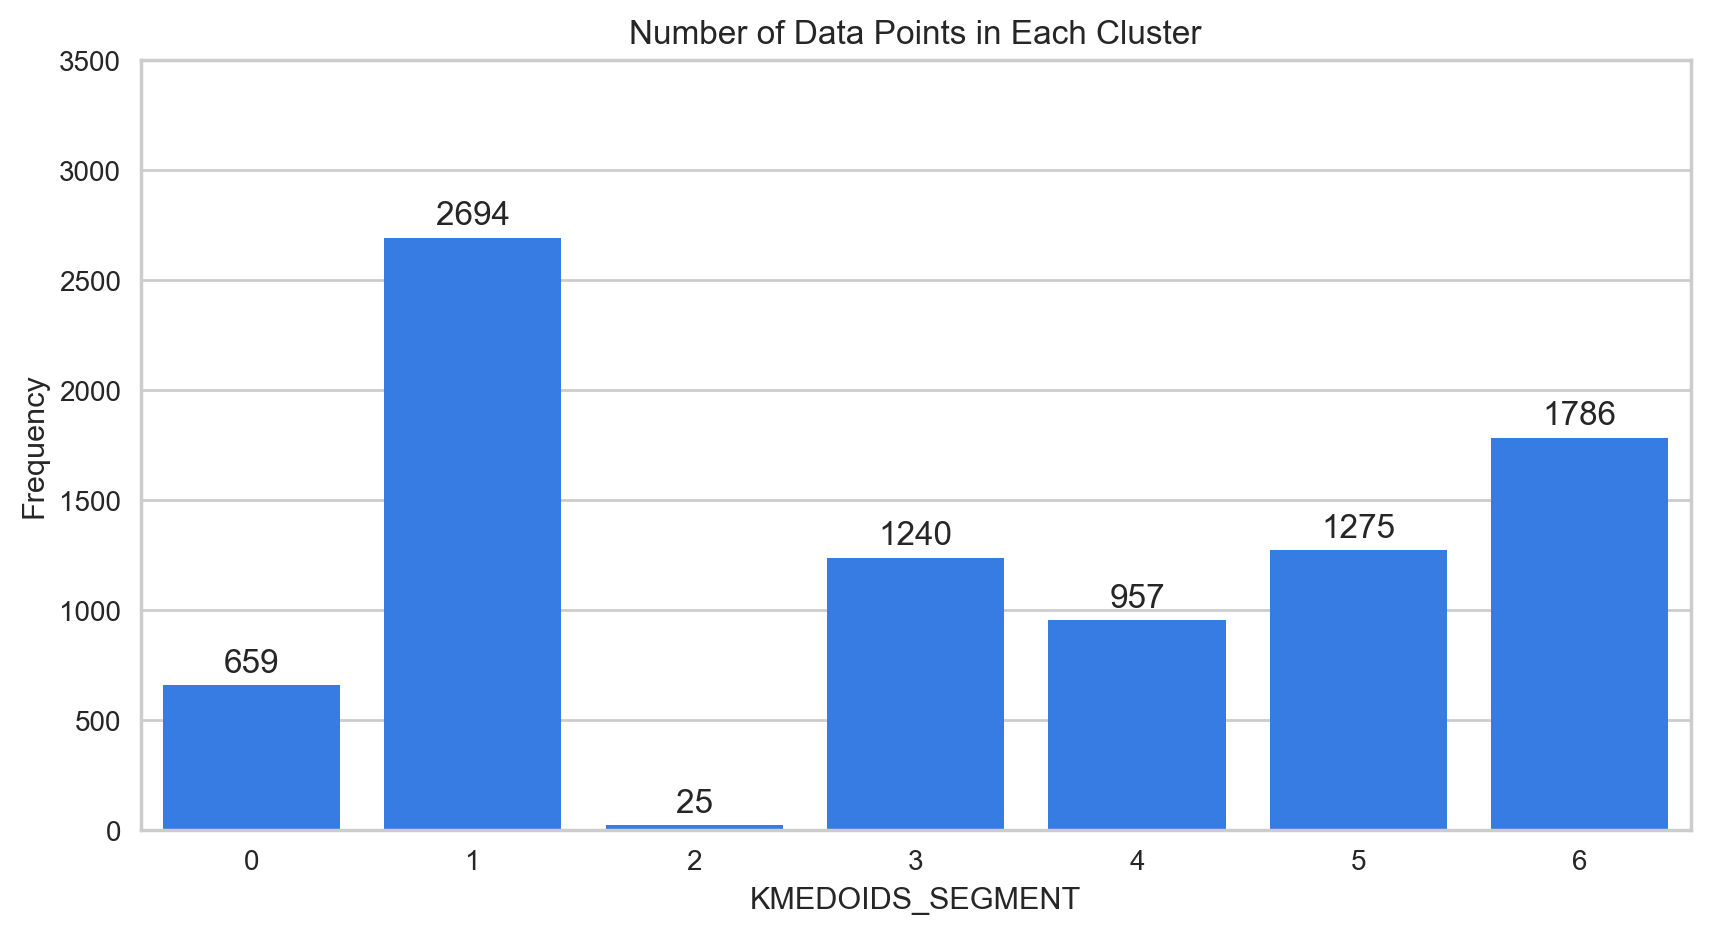

In [44]:
# Menampilkan Count Plot Hasil Clustering
dtf_c1= df_kmedoids.copy()

fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=dtf_c1,x="KMEDOIDS_SEGMENT",color="#1a76ff")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=3500)
ax.set_ylabel("Frequency")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

In [45]:
df_kmedoids.groupby('KMEDOIDS_SEGMENT').mean()

,Component 1,Component 2,Component 3,Component 4,Component 5
KMEDOIDS_SEGMENT,,,,,
0,0.288256,0.222667,1.223039,1.638851,0.199838
1,-0.257074,-0.181625,-0.787287,0.272849,0.317194
2,10.476769,0.046741,-0.243728,0.821532,-2.766168
3,-0.065507,-0.428411,-0.509195,-0.244927,-1.698735
4,-0.075457,2.101235,-0.316406,-0.256074,0.087159
5,1.098724,-0.493773,0.097621,-0.588351,0.932192
6,-0.563692,-0.284825,1.193055,-0.300490,-0.046240


Dari hasil di atas, dapat kita lihat bahwa segmen segmen yang dihasilkan memiliki ciri khas tersendiri yang merepresentasikan karakteristik pengguna, diantaranya:
* Cluster 0: **Installment Lover**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung melakukan pembelian installment yang tinggi, yaitu pembelian yang dilakukan dengan cicilan atau pembayaran berkala. Mereka juga memiliki nilai rata-rata balance yang rendah, yang berarti mereka tidak memiliki banyak hutang atau tagihan kartu kredit.
* Cluster 1: **Full Payer**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung membayar seluruh tagihan kartu kredit mereka setiap bulan, yang ditunjukkan oleh nilai rata-rata PRC_FULL_PAYMENT yang tinggi. Mereka juga memiliki nilai rata-rata minimum payments yang rendah, yang berarti mereka tidak memiliki banyak kewajiban pembayaran minimum.
* Cluster 2: **Low Balance**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung memiliki nilai rata-rata balance yang rendah, yang berarti mereka tidak memiliki banyak hutang atau tagihan kartu kredit. Mereka juga memiliki nilai rata-rata balance frequency yang rendah, yang berarti mereka jarang menggunakan kartu kredit mereka.
* Cluster 3: **Big Spender**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung melakukan pembelian yang tinggi, yang ditunjukkan oleh nilai rata-rata purchases yang sangat tinggi. Mereka juga memiliki nilai rata-rata credit limit yang tinggi, yang berarti mereka memiliki batas kredit yang besar untuk melakukan pembelian.
* Cluster 4: **One-off Buyer**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung melakukan pembelian one-off yang tinggi, yaitu pembelian yang dilakukan sekali saja tanpa cicilan atau pembayaran berkala. Mereka juga memiliki nilai rata-rata one-off purchases frequency yang tinggi, yang berarti mereka sering melakukan pembelian one-off.
* Cluster 5: **Cash Advance User**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung menggunakan cash advance yang tinggi, yaitu pinjaman atau kredit yang diberikan oleh kartu kredit. Mereka juga memiliki nilai rata-rata cash advance frequency dan cash advance trx yang tinggi, yang berarti mereka sering menggunakan cash advance.
* Cluster 6: **High Balance**. Label ini menggambarkan bahwa konsumen dalam cluster ini cenderung memiliki nilai rata-rata balance yang tinggi, yang berarti mereka memiliki banyak hutang atau tagihan kartu kredit. Mereka juga memiliki nilai rata-rata purchases installment frequency yang tinggi, yang berarti mereka sering melakukan pembelian dengan cicilan atau pembayaran berkala.

In [46]:
df_kmedoids['LABELS1'] = df_kmedoids['KMEDOIDS_SEGMENT'].map({0: "Installment Lover",
                                                         1: "Full Payer",
                                                         2: "Low Balance",
                                                         3: "Big Spender",
                                                      4: "One-off Buyer",
                                                      5: "Cash Advance User",
                                                      6: "High Balance"})
df_kmedoids

,Component 1,Component 2,Component 3,Component 4,Component 5,KMEDOIDS_SEGMENT,LABELS1
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331,1,Full Payer
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249,4,One-off Buyer
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243,5,Cash Advance User
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370,1,Full Payer
4,-0.595084,-0.556173,0.640184,1.021097,0.057387,0,Installment Lover
...,...,...,...,...,...,...,...
8631,-0.377747,-0.090877,-0.715237,-1.735043,-1.132726,3,Big Spender
8632,-1.008494,0.323418,1.577968,-2.047203,-0.329579,6,High Balance
8633,-0.931340,0.197282,0.997555,-1.852388,-0.503891,6,High Balance
8634,-0.582189,0.397432,-0.507620,-1.903179,-0.658830,3,Big Spender


In [47]:
count_table1 = df_kmedoids['LABELS1'].value_counts().sort_index()
count_table1.columns = ['LABELS1', 'Count']

print("Pembagian Pengguna Kartu Kredit Berdasarkan Cluster:")
print(count_table1)

Pembagian Pengguna Kartu Kredit Berdasarkan Cluster:
Big Spender          1240
Cash Advance User    1275
Full Payer           2694
High Balance         1786
Installment Lover     659
Low Balance            25
One-off Buyer         957
Name: LABELS1, dtype: int64


In [48]:
# Menghitung metrik-metrik evaluasi
Inertia = round(kmedoids_model.inertia_, 7)
silhouette_avg_kmedoids = round(silhouette_score(df_fa, labels1), 7)
davies_bouldin_kmedoids = round(davies_bouldin_score(df_fa, labels1), 7)
calinski_harabasz_kmedoids = round(calinski_harabasz_score(df_fa, labels1), 7)

test_kmedoids = pd.DataFrame({'KMedoids': [Inertia, silhouette_avg_kmedoids,
                                       davies_bouldin_kmedoids,
                                       calinski_harabasz_kmedoids]},
index=['Inertia', 'Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmedoids

,KMedoids
Inertia,10675.652702
Silhouette Score,0.279616
Davies-Bouldin,1.173673
Calinski-Harabasz,1744.222569


Berdasarkan hasil evaluasi performa dari algoritma KMedoids pada dataset, dapat dilihat:

* Inertia:
Nilai inertia sebesar 10675.652702 pada KMedoids mengukur seberapa jauh titik-titik data dalam sebuah cluster dari medoidnya (titik pusat aktual). Seperti pada KMeans, semakin rendah nilai inertia, semakin baik, karena hal ini menunjukkan bahwa cluster memiliki titik-titik yang lebih rapat dan homogen.
* Silhouette Score:
Silhouette score sebesar 0.279616 pada KMedoids menunjukkan seberapa baik pembagian data ke dalam cluster-cluster yang terbentuk. 
* Davies-Bouldin:
Nilai Davies-Bouldin sebesar 1.173673 pada KMedoids mengukur seberapa baik cluster terbentuk dan berbeda satu sama lain. Nilai yang rendah masih menunjukkan bahwa cluster memiliki sejumlah perbedaan yang baik.
* Calinski-Harabasz:
Nilai Calinski-Harabasz sebesar 1744.222569 mencerminkan seberapa baik cluster-cluster terbentuk dan seberapa jelas perbedaan antara cluster-cluster tersebut pada KMedoids.

# 8. Kesimpulan

Berdasarkan analisis pengelompokan yang dilakukan dengan metode K-Means dan K-Medoids menggunakan nilai k=7. Penamaan dilakukan berdasarkan karakteristik jumlah pengguna kartu kredit dengan jenis penggunaan kartu kredit di setiap kelompok. Dari algoritma K-Means, terdapat 23 Big Spender, 821 Cash Advance User, 3033 Full Payer, 232 High Balance, 2074 Installment Lover, 1223 Low Balance, dan 1230 One-off Buyer. Sementara itu, menggunakan metode K-Medoids, terdapat 1240 Big Spender, 1275 Cash Advance User, 2694 Full Payer, 1786 High Balance, 659 Installment Lover, 25 Low Balance, dan 957 One-off Buyer. Evaluasi terhadap algoritma K-Means dan K-Medoids untuk pengelompokan penggunaan kartu kredit dilakukan menggunakan Inertia, Silhouette Score, Davies-Bouldin, dan Calinski-Harabasz. Hal ini menunjukkan bahwa metode K-Means lebih baik untuk pengelompokan kerusakan lingkungan dibandingkan dengan menggunakan metode K-Medoids. Analisis lebih lanjut mungkin diperlukan untuk sepenuhnya memahami karakteristik dan kebutuhan dari setiap kelompok, tetapi hasil dari penelitian ini memberikan dasar yang kuat untuk penelitian lebih lanjut di bidang ini.